In [1]:
# GPU setting
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="7"

# modules setting

import numpy as np
import glob
import matplotlib.pyplot as plt
from utils import ResNet, VGGNet
from utils import load_data_and_label
from utils import one_hot, model_pred, accuracy, con_mat, plot_con_mat, compute_accr_std

# Imort Model

In [76]:
import tensorflow as tf

In [77]:
test_graph = tf.Graph()
with test_graph.as_default():
    sess = tf.Session(graph = test_graph)
    loader = tf.train.import_meta_graph(os.path.join(model_dir, model[-1]) + '.meta')
    loader.restore(sess, os.path.join(model_dir, model[-1]))

In [95]:
[i.values()[0].name for i in test_graph.get_operations() if i.values() != () and 'dense' in i.values()[0].name and 'BiasAdd:0' in i.values()[0].name]

['dense_32/BiasAdd:0']

In [96]:
class SEResNet:  
    def __init__(self, model_path):
        self.test_graph = tf.Graph()
        with self.test_graph.as_default():
            self.sess = tf.Session(graph = self.test_graph)
            loader = tf.train.import_meta_graph(model_path + '.meta')
            loader.restore(self.sess, model_path)

            self.bn_prob = self.test_graph.get_tensor_by_name('bn_prob:0')
            self.x = self.test_graph.get_tensor_by_name('img:0')
            self.score = self.test_graph.get_tensor_by_name('dense_32/BiasAdd:0')

    def get_softmax(self, image):
        softmax = self.sess.run(tf.nn.softmax(self.score), feed_dict={self.x: image, self.bn_prob: False})
        return softmax

In [185]:
# model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/HHT'
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'res50_v2' in i and 'exp_r' in i]

model

['hht_exp_res50_v2_1912150129_15920_val_acc_1.00_val_loss_0.000005',
 'hht_exp_res50_v2_1912150129_15990_val_acc_1.00_val_loss_0.000004',
 'hht_exp_res50_v2_1912150130_16650_val_acc_1.00_val_loss_0.000004',
 'hht_exp_res50_v2_1912150130_17070_val_acc_1.00_val_loss_0.000003',
 'hht_exp_res50_v2_1912150133_19390_val_acc_1.00_val_loss_0.000003']

In [187]:
HHT_8ch_Res50 = ResNet(os.path.join(model_dir, model[-1]))

In [226]:
model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/HHT'
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'se' in i]

model

['hht_6ch_seres50_1912151647_35410_val_acc_1.00_val_loss_0.000020',
 'hht_6ch_seres50_1912151647_35450_val_acc_1.00_val_loss_0.000014',
 'hht_6ch_seres50_1912151648_35790_val_acc_1.00_val_loss_0.000012',
 'hht_6ch_seres50_1912151649_36990_val_acc_1.00_val_loss_0.000011',
 'hht_6ch_seres50_1912151651_38250_val_acc_1.00_val_loss_0.000009',
 'hht_8ch_seres50g_1912151950_13910_val_acc_1.00_val_loss_0.002536',
 'hht_8ch_seres50g_1912151950_14050_val_acc_1.00_val_loss_0.002340',
 'hht_8ch_seres50g_1912151952_14730_val_acc_1.00_val_loss_0.001971',
 'hht_8ch_seres50g_1912151952_15020_val_acc_1.00_val_loss_0.001715',
 'hht_8ch_seres50g_1912151953_15330_val_acc_1.00_val_loss_0.001204',
 'hht_exp_seres50_1912150506_12530_val_acc_1.00_val_loss_0.000014',
 'hht_exp_seres50_1912150506_12700_val_acc_1.00_val_loss_0.000011',
 'hht_exp_seres50_1912150512_16460_val_acc_1.00_val_loss_0.000010',
 'hht_exp_seres50_1912150513_16620_val_acc_1.00_val_loss_0.000008',
 'hht_exp_seres50_1912150515_17850_val_acc_

In [224]:
HHT_8ch_SERes50 = SEResNet(os.path.join(model_dir, model[-1]))

In [238]:
model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/HHT'
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'seres50g' in i]

model

['hht_8ch_seres50g_1912152033_36630_val_acc_1.00_val_loss_0.000051',
 'hht_8ch_seres50g_1912152034_36860_val_acc_1.00_val_loss_0.000045',
 'hht_8ch_seres50g_1912152035_37720_val_acc_1.00_val_loss_0.000033',
 'hht_8ch_seres50g_1912152039_39450_val_acc_1.00_val_loss_0.000032',
 'hht_8ch_seres50g_1912152039_39480_val_acc_1.00_val_loss_0.000022']

In [239]:
HHT_8ch_SERes50g = SEResNet(os.path.join(model_dir, model[-1]))

In [229]:
model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/HHT'
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'ch_res50g' in i]

model

['hht_8ch_res50g_1912151847_39060_val_acc_1.00_val_loss_0.000001',
 'hht_8ch_res50g_1912151847_39160_val_acc_1.00_val_loss_0.000001',
 'hht_8ch_res50g_1912151847_39320_val_acc_1.00_val_loss_0.000000',
 'hht_8ch_res50g_1912151847_39510_val_acc_1.00_val_loss_0.000000',
 'hht_8ch_res50g_1912151848_39790_val_acc_1.00_val_loss_0.000000',
 'hht_8ch_res50g_1912151946_17210_val_acc_1.00_val_loss_0.000068',
 'hht_8ch_res50g_1912151948_19780_val_acc_1.00_val_loss_0.000045',
 'hht_8ch_res50g_1912151951_22170_val_acc_1.00_val_loss_0.000039',
 'hht_8ch_res50g_1912151952_23220_val_acc_1.00_val_loss_0.000038',
 'hht_8ch_res50g_1912151952_23630_val_acc_1.00_val_loss_0.000030']

In [230]:
HHT_8ch_Res50g = ResNet(os.path.join(model_dir, model[-1]))

In [248]:
model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/HHT'
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'ch_res50g_dw' in i]

model

['hht_8ch_res50g_dw_1912152142_32940_val_acc_1.00_val_loss_0.000594',
 'hht_8ch_res50g_dw_1912152144_33990_val_acc_1.00_val_loss_0.000593',
 'hht_8ch_res50g_dw_1912152146_34770_val_acc_1.00_val_loss_0.000520',
 'hht_8ch_res50g_dw_1912152155_39530_val_acc_1.00_val_loss_0.000472',
 'hht_8ch_res50g_dw_1912152155_39610_val_acc_1.00_val_loss_0.000399']

In [249]:
HHT_8ch_Res50g_dw = ResNet(os.path.join(model_dir, model[-1]))

In [251]:
model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/HHT'
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'ch_res50g_v2' in i]

model

['hht_8ch_res50g_v2_1912152043_13910_val_acc_1.00_val_loss_0.000557',
 'hht_8ch_res50g_v2_1912152044_15110_val_acc_1.00_val_loss_0.000427',
 'hht_8ch_res50g_v2_1912152045_15600_val_acc_1.00_val_loss_0.000286',
 'hht_8ch_res50g_v2_1912152048_18580_val_acc_1.00_val_loss_0.000280',
 'hht_8ch_res50g_v2_1912152049_19950_val_acc_1.00_val_loss_0.000266']

In [252]:
HHT_8ch_Res50g_v2 = ResNet(os.path.join(model_dir, model[-1]))

In [191]:
model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/HHT'
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'n10' in i and '_res50_' in i]

model

['hht_8ch_n10_res50_1912151829_35140_val_acc_1.00_val_loss_0.000007',
 'hht_8ch_n10_res50_1912151829_35270_val_acc_1.00_val_loss_0.000006',
 'hht_8ch_n10_res50_1912151830_35440_val_acc_1.00_val_loss_0.000005',
 'hht_8ch_n10_res50_1912151834_39710_val_acc_1.00_val_loss_0.000005',
 'hht_8ch_n10_res50_1912151835_39860_val_acc_1.00_val_loss_0.000005']

In [192]:
HHT_8ch_n10_Res50 = ResNet(os.path.join(model_dir, model[-1]))

In [193]:
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'n8' in i and '_res50_' in i]

model

['hht_8ch_n8_res50_1912151835_34510_val_acc_1.00_val_loss_0.000009',
 'hht_8ch_n8_res50_1912151835_34540_val_acc_1.00_val_loss_0.000008',
 'hht_8ch_n8_res50_1912151838_37390_val_acc_1.00_val_loss_0.000008',
 'hht_8ch_n8_res50_1912151838_37460_val_acc_1.00_val_loss_0.000008',
 'hht_8ch_n8_res50_1912151838_37520_val_acc_1.00_val_loss_0.000005']

In [194]:
HHT_8ch_n8_Res50 = ResNet(os.path.join(model_dir, model[-1]))

In [195]:
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'n6' in i and '_res50_' in i]

model

['hht_8ch_n6_res50_1912151834_32760_val_acc_1.00_val_loss_0.000011',
 'hht_8ch_n6_res50_1912151834_32940_val_acc_1.00_val_loss_0.000010',
 'hht_8ch_n6_res50_1912151835_33040_val_acc_1.00_val_loss_0.000009',
 'hht_8ch_n6_res50_1912151835_33470_val_acc_1.00_val_loss_0.000008',
 'hht_8ch_n6_res50_1912151835_33560_val_acc_1.00_val_loss_0.000007']

In [196]:
HHT_8ch_n6_Res50 = ResNet(os.path.join(model_dir, model[-1]))

# Evaluation

## Load Data

In [197]:
test_8ch_dir =  '/mnt/disk1/yunseob/courses/19-2_computer vision/data/HHT/8ch/test'
test_x_8ch, labels_8ch = load_data_and_label(test_8ch_dir)

(2500, 100, 100, 8) (2500, 10)


In [199]:
noise_dir =  '/mnt/disk1/yunseob/courses/19-2_computer vision/data/HHT/8ch_noisy/test'
npy_files = os.listdir(noise_dir)
npy_files

['minus4.npy',
 'minus4_y.npy',
 'minus2.npy',
 'minus2_y.npy',
 '0.npy',
 '0_y.npy',
 '2.npy',
 '2_y.npy',
 '4.npy',
 '4_y.npy',
 '6.npy',
 '6_y.npy',
 '8.npy',
 '8_y.npy',
 '10.npy',
 '10_y.npy']

In [200]:
noise_10_x, noise_10_y = np.load(noise_dir + '/10.npy'), np.load(noise_dir + '/10_y.npy')
noise_8_x, noise_8_y = np.load(noise_dir + '/8.npy'), np.load(noise_dir + '/8_y.npy')
noise_6_x, noise_6_y = np.load(noise_dir + '/6.npy'), np.load(noise_dir + '/6_y.npy')

print(noise_10_x.shape, noise_10_y.shape)
print(noise_8_x.shape, noise_8_y.shape)
print(noise_6_x.shape, noise_6_y.shape)

(200, 100, 100, 8) (200, 10)
(200, 100, 100, 8) (200, 10)
(200, 100, 100, 8) (200, 10)


In [201]:
test_x_8ch_n10 = np.vstack([test_x_8ch, noise_10_x])
labels_8ch_n10 = np.vstack([labels_8ch, noise_10_y])

test_x_8ch_n8 = np.vstack([test_x_8ch, noise_10_x, noise_8_x])
labels_8ch_n8 = np.vstack([labels_8ch, noise_10_y, noise_8_y])

test_x_8ch_n6 = np.vstack([test_x_8ch, noise_10_x, noise_8_x, noise_6_x])
labels_8ch_n6 = np.vstack([labels_8ch, noise_10_y, noise_8_y, noise_6_y])

## Model Inference

In [202]:
preds_H_R = model_pred(HHT_8ch_Res50, test_x_8ch, n_batch = 300)
preds_H_S = model_pred(HHT_8ch_SERes50, test_x_8ch, n_batch = 300)

Inference Time: 00:00:20
Inference Time: 00:00:31


In [231]:
preds_H_G = model_pred(HHT_8ch_Res50g, test_x_8ch, n_batch = 300)

Inference Time: 00:00:30


In [253]:
preds_H_G_dw = model_pred(HHT_8ch_Res50g_dw, test_x_8ch, n_batch = 300)
preds_H_G_v2 = model_pred(HHT_8ch_Res50g_v2, test_x_8ch, n_batch = 300)

Inference Time: 00:00:42
Inference Time: 00:00:27


In [240]:
preds_H_SG = model_pred(HHT_8ch_SERes50g, test_x_8ch, n_batch = 300)

Inference Time: 00:00:35


In [203]:
preds_H_N10_R = model_pred(HHT_8ch_n10_Res50, test_x_8ch_n10, n_batch = 300)
preds_H_N8_R = model_pred(HHT_8ch_n8_Res50, test_x_8ch_n8, n_batch = 300)
preds_H_N6_R = model_pred(HHT_8ch_n6_Res50, test_x_8ch_n6, n_batch = 300)

Inference Time: 00:00:19
Inference Time: 00:00:20
Inference Time: 00:00:21


## Confusion Matrix

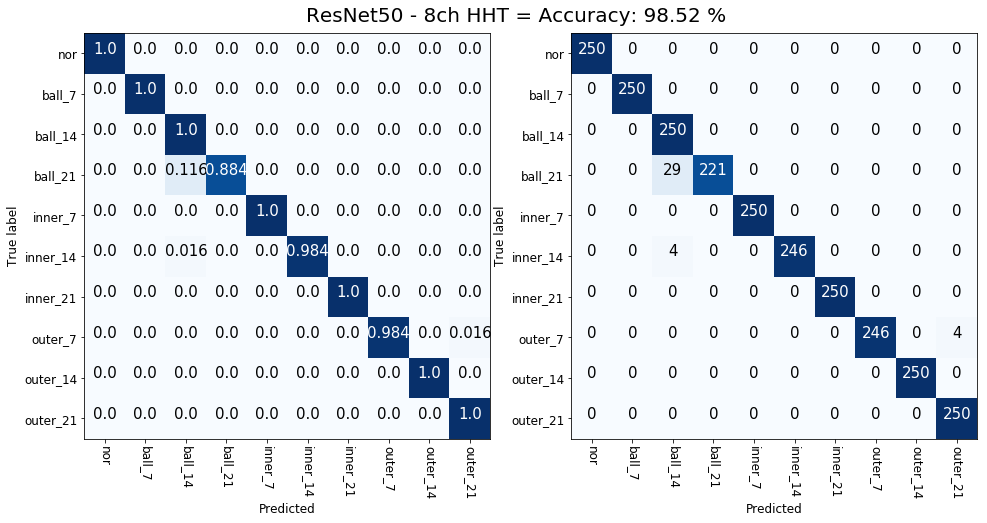

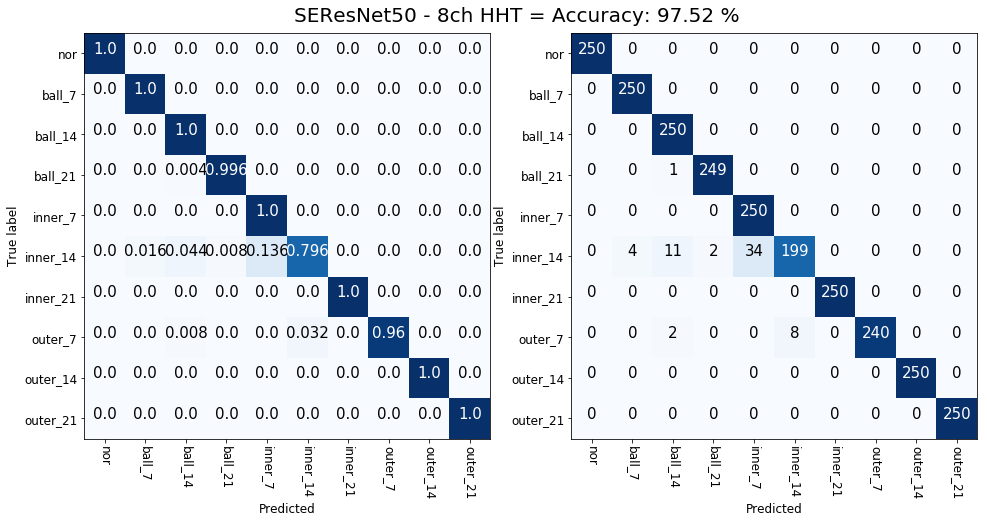

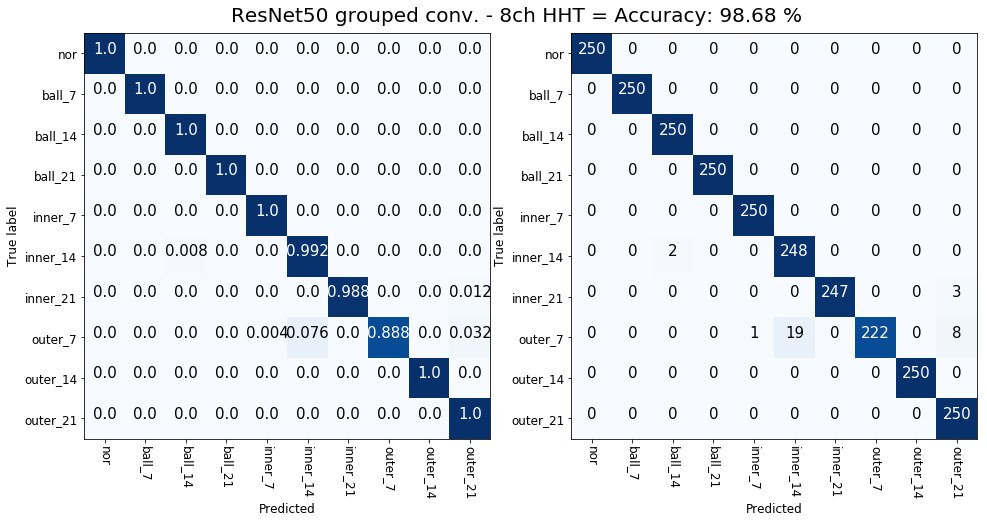

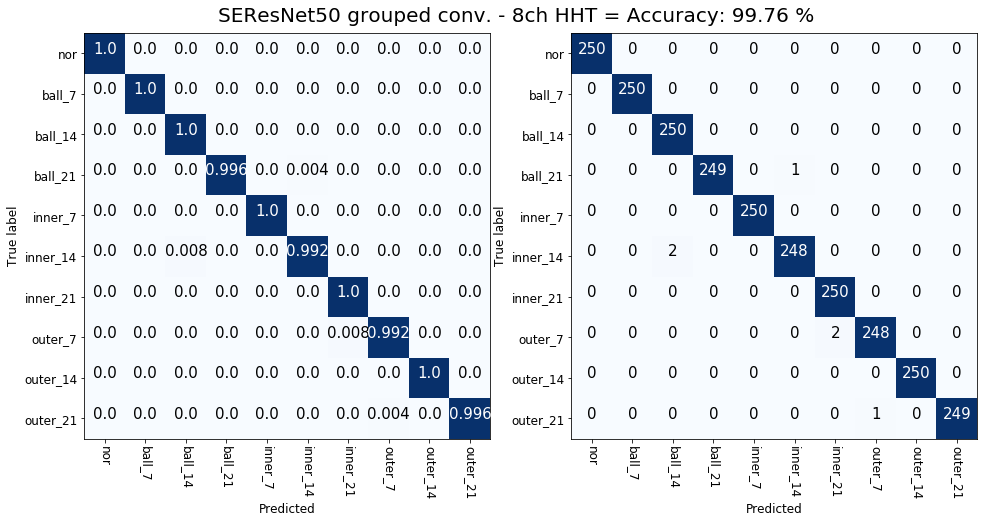

In [242]:
CM_H_R = con_mat(labels_8ch, preds_H_R)
accr = 100*np.sum(np.diag(CM_H_R))/np.sum(CM_H_R)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 - 8ch HHT = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_H_R, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_H_R, value_size = 15, label_size = 12, mode = 'num')
plt.show()

CM_H_S = con_mat(labels_8ch, preds_H_S)
accr = 100*np.sum(np.diag(CM_H_S))/np.sum(CM_H_S)
plt.figure(figsize=(16, 8))
plt.suptitle('SEResNet50 - 8ch HHT = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_H_S, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_H_S, value_size = 15, label_size = 12, mode = 'num')
plt.show()

CM_H_G = con_mat(labels_8ch, preds_H_G)
accr = 100*np.sum(np.diag(CM_H_G))/np.sum(CM_H_G)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 grouped conv. - 8ch HHT = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_H_G, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_H_G, value_size = 15, label_size = 12, mode = 'num')
plt.show()

CM_H_SG = con_mat(labels_8ch, preds_H_SG)
accr = 100*np.sum(np.diag(CM_H_SG))/np.sum(CM_H_SG)
plt.figure(figsize=(16, 8))
plt.suptitle('SEResNet50 grouped conv. - 8ch HHT = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_H_SG, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_H_SG, value_size = 15, label_size = 12, mode = 'num')
plt.show()

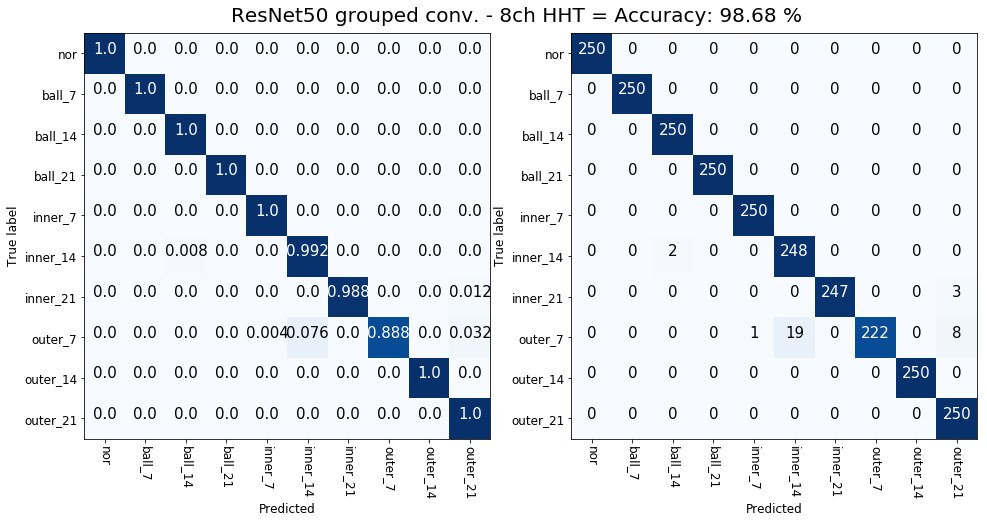

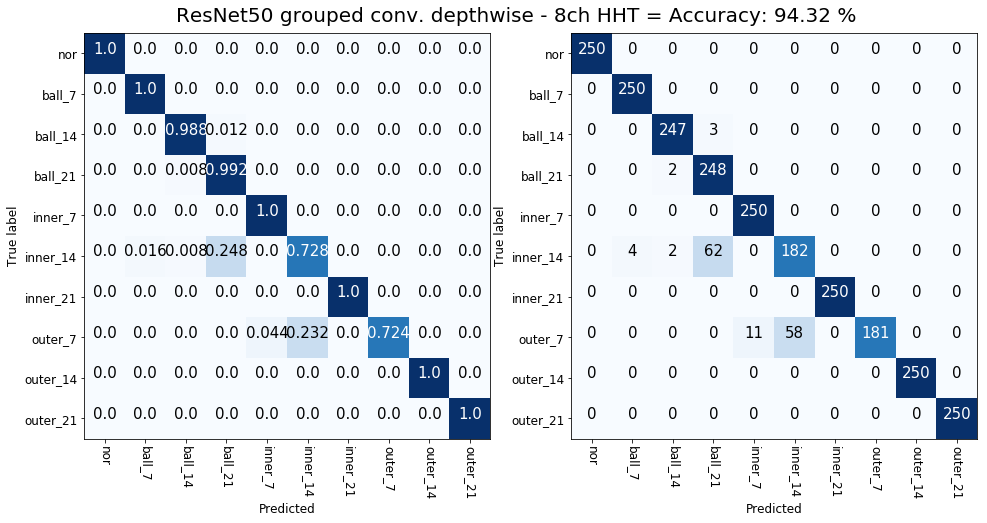

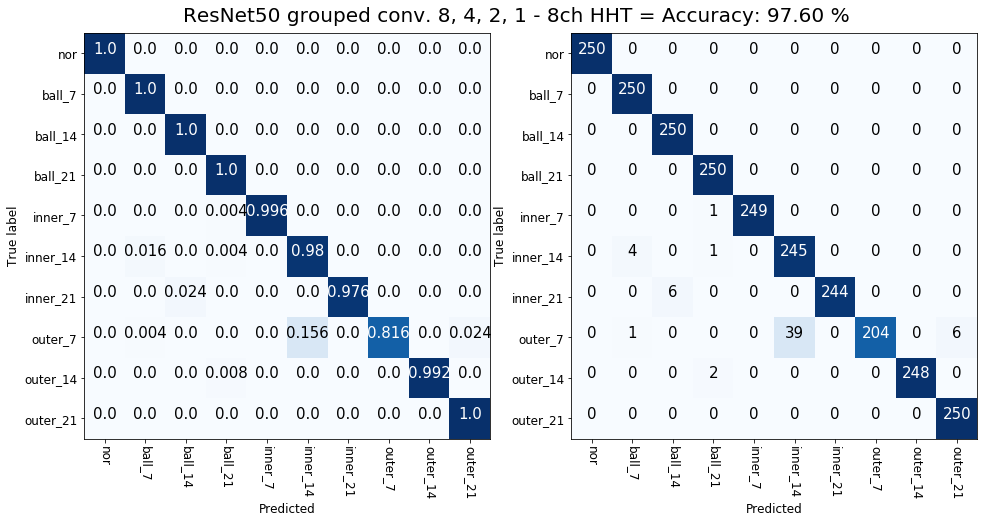

In [254]:
CM_H_G = con_mat(labels_8ch, preds_H_G)
accr = 100*np.sum(np.diag(CM_H_G))/np.sum(CM_H_G)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 grouped conv. - 8ch HHT = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_H_G, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_H_G, value_size = 15, label_size = 12, mode = 'num')
plt.show()

CM_H_G_dw = con_mat(labels_8ch, preds_H_G_dw)
accr = 100*np.sum(np.diag(CM_H_G_dw))/np.sum(CM_H_G_dw)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 grouped conv. depthwise - 8ch HHT = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_H_G_dw, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_H_G_dw, value_size = 15, label_size = 12, mode = 'num')
plt.show()

CM_H_G_v2 = con_mat(labels_8ch, preds_H_G_v2)
accr = 100*np.sum(np.diag(CM_H_G_v2))/np.sum(CM_H_G_v2)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 grouped conv. 8, 4, 2, 1 - 8ch HHT = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_H_G_v2, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_H_G_v2, value_size = 15, label_size = 12, mode = 'num')
plt.show()

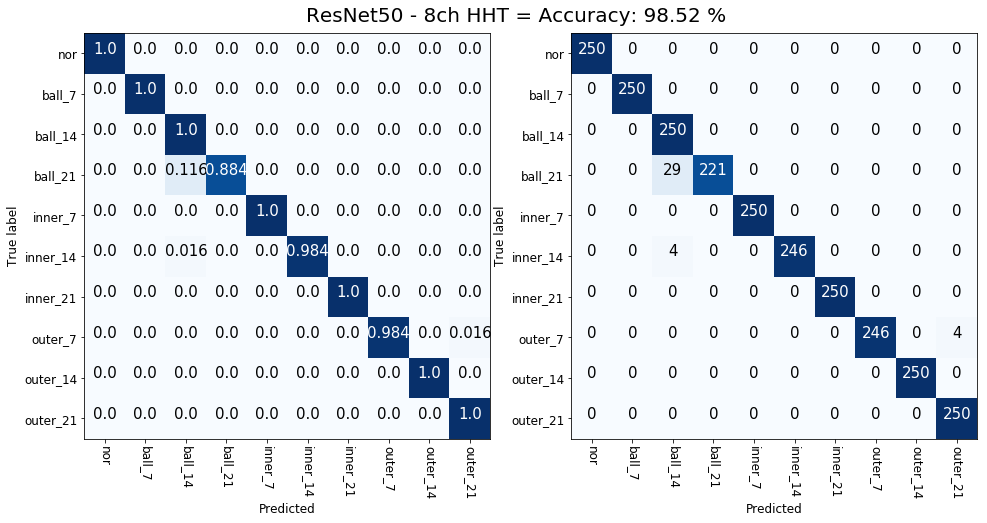

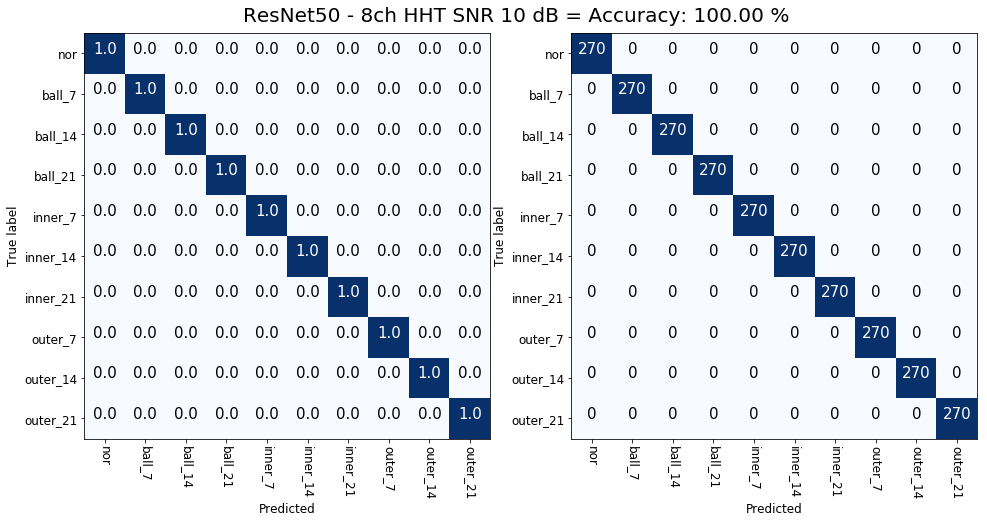

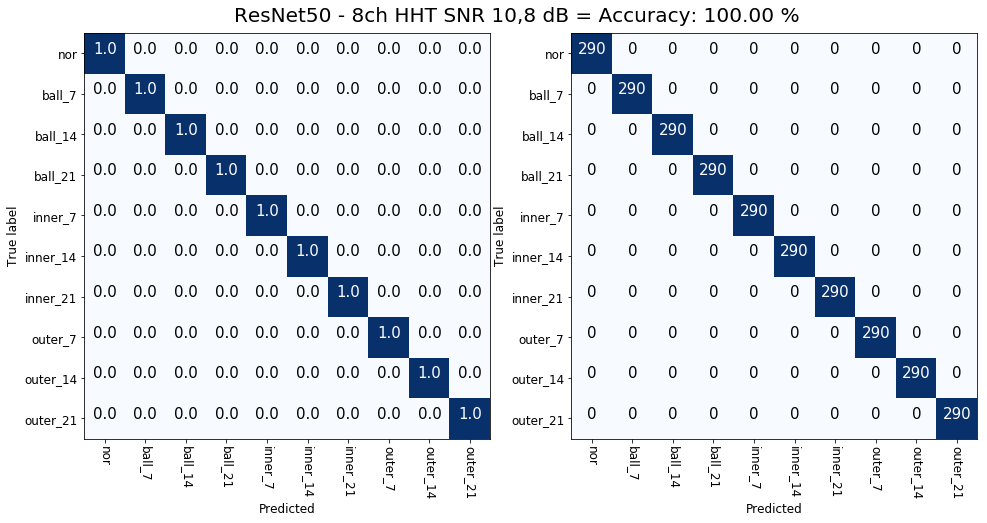

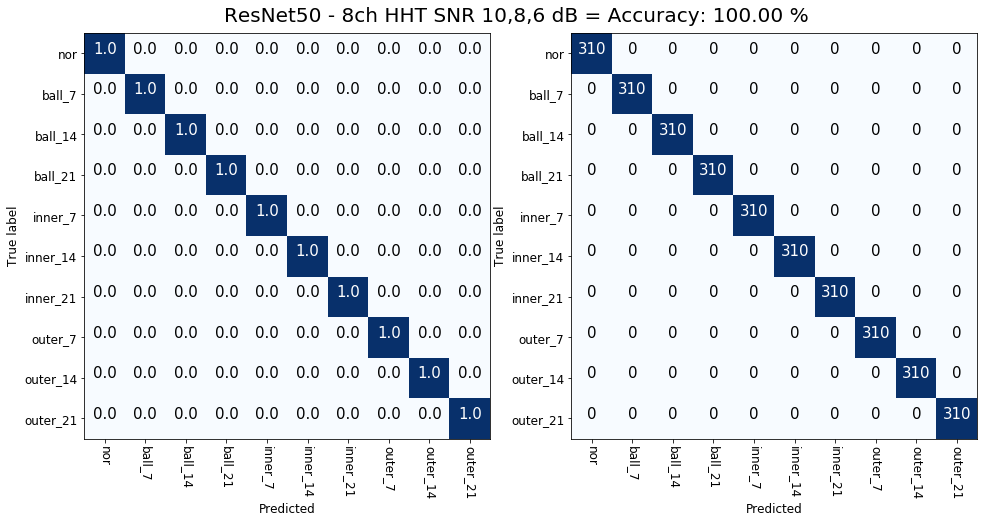

In [205]:
CM_H_R = con_mat(labels_8ch, preds_H_R)
accr = 100*np.sum(np.diag(CM_H_R))/np.sum(CM_H_R)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 - 8ch HHT = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_H_R, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_H_R, value_size = 15, label_size = 12, mode = 'num')
plt.show()

CM_H_N10_R = con_mat(labels_8ch_n10, preds_H_N10_R)
accr = 100*np.sum(np.diag(CM_H_N10_R))/np.sum(CM_H_N10_R)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 - 8ch HHT SNR 10 dB = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_H_N10_R, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_H_N10_R, value_size = 15, label_size = 12, mode = 'num')
plt.show()

CM_H_N8_R = con_mat(labels_8ch_n8, preds_H_N8_R)
accr = 100*np.sum(np.diag(CM_H_N8_R))/np.sum(CM_H_N8_R)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 - 8ch HHT SNR 10,8 dB = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_H_N8_R, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_H_N8_R, value_size = 15, label_size = 12, mode = 'num')
plt.show()

CM_H_N6_R = con_mat(labels_8ch_n6, preds_H_N6_R)
accr = 100*np.sum(np.diag(CM_H_N6_R))/np.sum(CM_H_N6_R)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 - 8ch HHT SNR 10,8,6 dB = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_H_N6_R, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_H_N6_R, value_size = 15, label_size = 12, mode = 'num')
plt.show()

## Training history

In [103]:
res50_hht_exp_accr_hist = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_v2_HHT_exp_accr.npy')
res50_hht_lin_accr_hist = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_v2_HHT_lin_accr.npy')
res50_stft_v1_accr_hist = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_v2_STFT_v1_accr.npy')
vgg16_stft_v1_accr_hist = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_v2_STFT_v1_accr.npy')
res50_stft_v2_accr_hist = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_v2_STFT_v2_accr.npy')
res50_hht_exp_loss_hist = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_v2_HHT_exp_loss.npy')
res50_hht_lin_loss_hist = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_v2_HHT_lin_loss.npy')
res50_stft_v1_loss_hist = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_v2_STFT_v1_loss.npy')
vgg16_stft_v1_loss_hist = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_v2_STFT_v1_loss.npy')
res50_stft_v2_loss_hist = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_v2_STFT_v2_loss.npy')

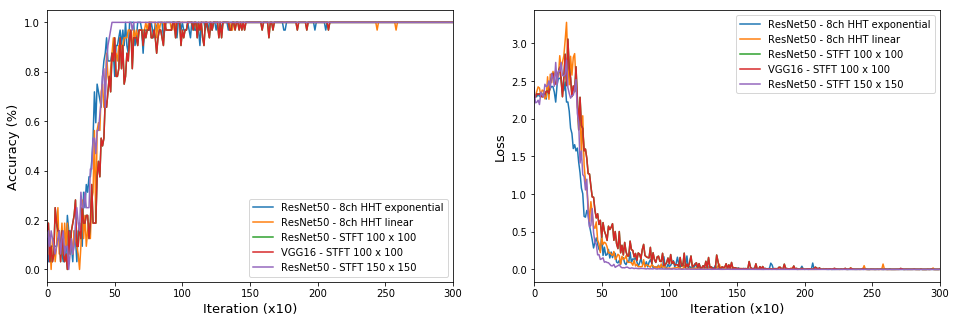

In [104]:
plt.figure(figsize = (16, 5))

plt.subplot(121)
plt.plot(res50_hht_exp_accr_hist, label = 'ResNet50 - 8ch HHT exponential')
plt.plot(res50_hht_lin_accr_hist, label = 'ResNet50 - 8ch HHT linear')
plt.plot(res50_stft_v1_accr_hist, label = 'ResNet50 - STFT 100 x 100')
plt.plot(vgg16_stft_v1_accr_hist, label = 'VGG16 - STFT 100 x 100')
plt.plot(res50_stft_v2_accr_hist, label = 'ResNet50 - STFT 150 x 150')
plt.legend(fontsize = 10)
plt.xlim([0, 300])
plt.xlabel('Iteration (x10)', fontsize = 13)
plt.ylabel('Accuracy (%)', rotation = 90, fontsize = 13)

plt.subplot(122)
plt.plot(res50_hht_exp_loss_hist, label = 'ResNet50 - 8ch HHT exponential')
plt.plot(res50_hht_lin_loss_hist, label = 'ResNet50 - 8ch HHT linear')
plt.plot(res50_stft_v1_loss_hist, label = 'ResNet50 - STFT 100 x 100')
plt.plot(vgg16_stft_v1_loss_hist, label = 'VGG16 - STFT 100 x 100')
plt.plot(res50_stft_v2_loss_hist, label = 'ResNet50 - STFT 150 x 150')
plt.legend(fontsize = 10)
plt.xlim([0, 300])
plt.xlabel('Iteration (x10)', fontsize = 13)
plt.ylabel('Loss', rotation = 90, fontsize = 13)
plt.show()

# Noise Analysis

## Import Data

In [206]:
def plot_channelwise(data, ch = 8, cmap_style = 'jet'):
    plt.figure(figsize = (16, 6))
    for i in range(ch):
        plt.subplot(1, ch, i+1); plt.imshow(data[:, :, i], cmap = cmap_style); plt.axis('off')
    plt.show()

In [207]:
noise_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/data/HHT/8ch_noisy'
noise_db = sorted(os.listdir(noise_dir))

noise_db

['.ipynb_checkpoints',
 '0.npy',
 '0_y.npy',
 '10.npy',
 '10_y.npy',
 '2.npy',
 '2_y.npy',
 '4.npy',
 '4_y.npy',
 '6.npy',
 '6_y.npy',
 '8.npy',
 '8_y.npy',
 'minus2.npy',
 'minus2_y.npy',
 'minus4.npy',
 'minus4_y.npy',
 'test',
 'train']

In [208]:
test_x_hht_m4 = np.load(os.path.join(noise_dir, 'minus4.npy'))
test_x_hht_m2 = np.load(os.path.join(noise_dir, 'minus2.npy'))
test_x_hht_0 = np.load(os.path.join(noise_dir, '0.npy'))
test_x_hht_2 = np.load(os.path.join(noise_dir, '2.npy'))
test_x_hht_4 = np.load(os.path.join(noise_dir, '4.npy'))
test_x_hht_6 = np.load(os.path.join(noise_dir, '6.npy'))
test_x_hht_8 = np.load(os.path.join(noise_dir, '8.npy'))
test_x_hht_10 = np.load(os.path.join(noise_dir, '10.npy'))

labels_hht_m4 = np.load(os.path.join(noise_dir, 'minus4_y.npy'))
labels_hht_m2 = np.load(os.path.join(noise_dir, 'minus2_y.npy'))
labels_hht_0 = np.load(os.path.join(noise_dir, '0_y.npy'))
labels_hht_2 = np.load(os.path.join(noise_dir, '2_y.npy'))
labels_hht_4 = np.load(os.path.join(noise_dir, '4_y.npy'))
labels_hht_6 = np.load(os.path.join(noise_dir, '6_y.npy'))
labels_hht_8 = np.load(os.path.join(noise_dir, '8_y.npy'))
labels_hht_10 = np.load(os.path.join(noise_dir, '10_y.npy'))

print(test_x_hht_m4.shape, labels_hht_m4.shape)

(1000, 100, 100, 8) (1000, 10)


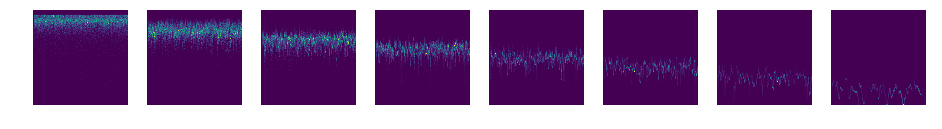

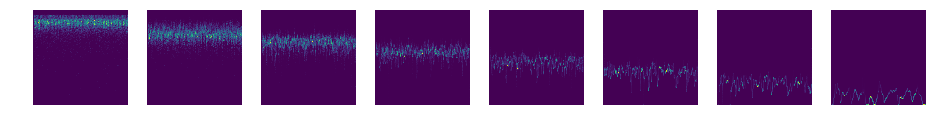

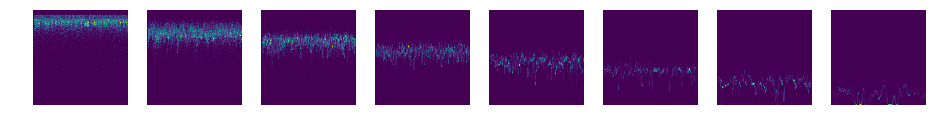

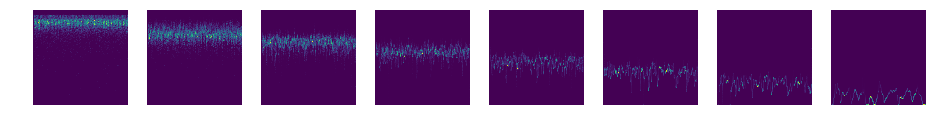

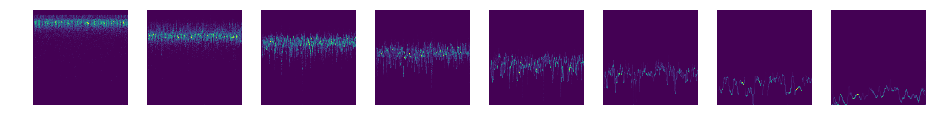

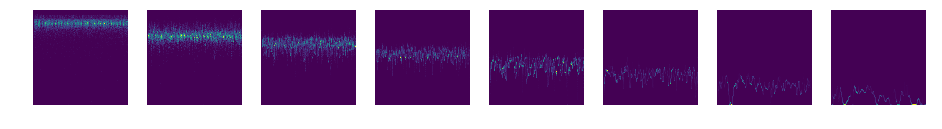

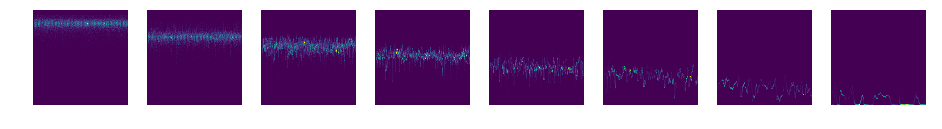

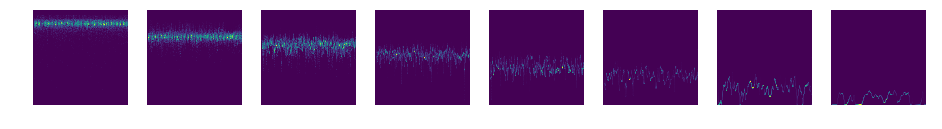

In [209]:
n = np.random.randint(1000)

plot_channelwise(test_x_hht_m4[n], ch = 8, cmap_style = None)
plot_channelwise(test_x_hht_m2[n], ch = 8, cmap_style = None)
plot_channelwise(test_x_hht_0[n], ch = 8, cmap_style = None)
plot_channelwise(test_x_hht_2[n], ch = 8, cmap_style = None)
plot_channelwise(test_x_hht_4[n], ch = 8, cmap_style = None)
plot_channelwise(test_x_hht_6[n], ch = 8, cmap_style = None)
plot_channelwise(test_x_hht_8[n], ch = 8, cmap_style = None)
plot_channelwise(test_x_hht_10[n], ch = 8, cmap_style = None)

## Model Inference

In [210]:
preds_H_R_m4 = model_pred(HHT_8ch_Res50, test_x_hht_m4, n_batch = 300)
preds_H_R_m2 = model_pred(HHT_8ch_Res50, test_x_hht_m2, n_batch = 300)
preds_H_R_0 = model_pred(HHT_8ch_Res50, test_x_hht_0, n_batch = 300)
preds_H_R_2 = model_pred(HHT_8ch_Res50, test_x_hht_2, n_batch = 300)
preds_H_R_4 = model_pred(HHT_8ch_Res50, test_x_hht_4, n_batch = 300)
preds_H_R_6 = model_pred(HHT_8ch_Res50, test_x_hht_6, n_batch = 300)
preds_H_R_8 = model_pred(HHT_8ch_Res50, test_x_hht_8, n_batch = 300)
preds_H_R_10 = model_pred(HHT_8ch_Res50, test_x_hht_10, n_batch = 300)

preds_H_S_m4 = model_pred(HHT_8ch_SERes50, test_x_hht_m4, n_batch = 300)
preds_H_S_m2 = model_pred(HHT_8ch_SERes50, test_x_hht_m2, n_batch = 300)
preds_H_S_0 = model_pred(HHT_8ch_SERes50, test_x_hht_0, n_batch = 300)
preds_H_S_2 = model_pred(HHT_8ch_SERes50, test_x_hht_2, n_batch = 300)
preds_H_S_4 = model_pred(HHT_8ch_SERes50, test_x_hht_4, n_batch = 300)
preds_H_S_6 = model_pred(HHT_8ch_SERes50, test_x_hht_6, n_batch = 300)
preds_H_S_8 = model_pred(HHT_8ch_SERes50, test_x_hht_8, n_batch = 300)
preds_H_S_10 = model_pred(HHT_8ch_SERes50, test_x_hht_10, n_batch = 300)

Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:14
Inference Time: 00:00:13
Inference Time: 00:00:13
Inference Time: 00:00:13
Inference Time: 00:00:13
Inference Time: 00:00:14
Inference Time: 00:00:14
Inference Time: 00:00:14


In [233]:
preds_H_G_m4 = model_pred(HHT_8ch_Res50g, test_x_hht_m4, n_batch = 300)
preds_H_G_m2 = model_pred(HHT_8ch_Res50g, test_x_hht_m2, n_batch = 300)
preds_H_G_0 = model_pred(HHT_8ch_Res50g, test_x_hht_0, n_batch = 300)
preds_H_G_2 = model_pred(HHT_8ch_Res50g, test_x_hht_2, n_batch = 300)
preds_H_G_4 = model_pred(HHT_8ch_Res50g, test_x_hht_4, n_batch = 300)
preds_H_G_6 = model_pred(HHT_8ch_Res50g, test_x_hht_6, n_batch = 300)
preds_H_G_8 = model_pred(HHT_8ch_Res50g, test_x_hht_8, n_batch = 300)
preds_H_G_10 = model_pred(HHT_8ch_Res50g, test_x_hht_10, n_batch = 300)

Inference Time: 00:00:13
Inference Time: 00:00:12
Inference Time: 00:00:12
Inference Time: 00:00:12
Inference Time: 00:00:12
Inference Time: 00:00:12
Inference Time: 00:00:12
Inference Time: 00:00:12


In [255]:
preds_H_G_dw_m4 = model_pred(HHT_8ch_Res50g_dw, test_x_hht_m4, n_batch = 300)
preds_H_G_dw_m2 = model_pred(HHT_8ch_Res50g_dw, test_x_hht_m2, n_batch = 300)
preds_H_G_dw_0 = model_pred(HHT_8ch_Res50g_dw, test_x_hht_0, n_batch = 300)
preds_H_G_dw_2 = model_pred(HHT_8ch_Res50g_dw, test_x_hht_2, n_batch = 300)
preds_H_G_dw_4 = model_pred(HHT_8ch_Res50g_dw, test_x_hht_4, n_batch = 300)
preds_H_G_dw_6 = model_pred(HHT_8ch_Res50g_dw, test_x_hht_6, n_batch = 300)
preds_H_G_dw_8 = model_pred(HHT_8ch_Res50g_dw, test_x_hht_8, n_batch = 300)
preds_H_G_dw_10 = model_pred(HHT_8ch_Res50g_dw, test_x_hht_10, n_batch = 300)

Inference Time: 00:00:18
Inference Time: 00:00:18
Inference Time: 00:00:18
Inference Time: 00:00:18
Inference Time: 00:00:18
Inference Time: 00:00:18
Inference Time: 00:00:18
Inference Time: 00:00:18


In [256]:
preds_H_G_v2_m4 = model_pred(HHT_8ch_Res50g_v2, test_x_hht_m4, n_batch = 300)
preds_H_G_v2_m2 = model_pred(HHT_8ch_Res50g_v2, test_x_hht_m2, n_batch = 300)
preds_H_G_v2_0 = model_pred(HHT_8ch_Res50g_v2, test_x_hht_0, n_batch = 300)
preds_H_G_v2_2 = model_pred(HHT_8ch_Res50g_v2, test_x_hht_2, n_batch = 300)
preds_H_G_v2_4 = model_pred(HHT_8ch_Res50g_v2, test_x_hht_4, n_batch = 300)
preds_H_G_v2_6 = model_pred(HHT_8ch_Res50g_v2, test_x_hht_6, n_batch = 300)
preds_H_G_v2_8 = model_pred(HHT_8ch_Res50g_v2, test_x_hht_8, n_batch = 300)
preds_H_G_v2_10 = model_pred(HHT_8ch_Res50g_v2, test_x_hht_10, n_batch = 300)

Inference Time: 00:00:12
Inference Time: 00:00:12
Inference Time: 00:00:12
Inference Time: 00:00:12
Inference Time: 00:00:12
Inference Time: 00:00:12
Inference Time: 00:00:12
Inference Time: 00:00:12


In [243]:
preds_H_SG_m4 = model_pred(HHT_8ch_SERes50g, test_x_hht_m4, n_batch = 300)
preds_H_SG_m2 = model_pred(HHT_8ch_SERes50g, test_x_hht_m2, n_batch = 300)
preds_H_SG_0 = model_pred(HHT_8ch_SERes50g, test_x_hht_0, n_batch = 300)
preds_H_SG_2 = model_pred(HHT_8ch_SERes50g, test_x_hht_2, n_batch = 300)
preds_H_SG_4 = model_pred(HHT_8ch_SERes50g, test_x_hht_4, n_batch = 300)
preds_H_SG_6 = model_pred(HHT_8ch_SERes50g, test_x_hht_6, n_batch = 300)
preds_H_SG_8 = model_pred(HHT_8ch_SERes50g, test_x_hht_8, n_batch = 300)
preds_H_SG_10 = model_pred(HHT_8ch_SERes50g, test_x_hht_10, n_batch = 300)

Inference Time: 00:00:15
Inference Time: 00:00:14
Inference Time: 00:00:14
Inference Time: 00:00:15
Inference Time: 00:00:16
Inference Time: 00:00:16
Inference Time: 00:00:16
Inference Time: 00:00:15


In [211]:
preds_H_N10_R_m4 = model_pred(HHT_8ch_n10_Res50, test_x_hht_m4, n_batch = 300)
preds_H_N10_R_m2 = model_pred(HHT_8ch_n10_Res50, test_x_hht_m2, n_batch = 300)
preds_H_N10_R_0 = model_pred(HHT_8ch_n10_Res50, test_x_hht_0, n_batch = 300)
preds_H_N10_R_2 = model_pred(HHT_8ch_n10_Res50, test_x_hht_2, n_batch = 300)
preds_H_N10_R_4 = model_pred(HHT_8ch_n10_Res50, test_x_hht_4, n_batch = 300)
preds_H_N10_R_6 = model_pred(HHT_8ch_n10_Res50, test_x_hht_6, n_batch = 300)
preds_H_N10_R_8 = model_pred(HHT_8ch_n10_Res50, test_x_hht_8, n_batch = 300)
preds_H_N10_R_10 = model_pred(HHT_8ch_n10_Res50, test_x_hht_10, n_batch = 300)

Inference Time: 00:00:09
Inference Time: 00:00:09
Inference Time: 00:00:09
Inference Time: 00:00:09
Inference Time: 00:00:09
Inference Time: 00:00:09
Inference Time: 00:00:09
Inference Time: 00:00:08
Inference Time: 00:00:08


KeyboardInterrupt: 

In [213]:
preds_H_N8_R_m4 = model_pred(HHT_8ch_n8_Res50, test_x_hht_m4, n_batch = 300)
preds_H_N8_R_m2 = model_pred(HHT_8ch_n8_Res50, test_x_hht_m2, n_batch = 300)
preds_H_N8_R_0 = model_pred(HHT_8ch_n8_Res50, test_x_hht_0, n_batch = 300)
preds_H_N8_R_2 = model_pred(HHT_8ch_n8_Res50, test_x_hht_2, n_batch = 300)
preds_H_N8_R_4 = model_pred(HHT_8ch_n8_Res50, test_x_hht_4, n_batch = 300)
preds_H_N8_R_6 = model_pred(HHT_8ch_n8_Res50, test_x_hht_6, n_batch = 300)
preds_H_N8_R_8 = model_pred(HHT_8ch_n8_Res50, test_x_hht_8, n_batch = 300)
preds_H_N8_R_10 = model_pred(HHT_8ch_n8_Res50, test_x_hht_10, n_batch = 300)

preds_H_N6_R_m4 = model_pred(HHT_8ch_n6_Res50, test_x_hht_m4, n_batch = 300)
preds_H_N6_R_m2 = model_pred(HHT_8ch_n6_Res50, test_x_hht_m2, n_batch = 300)
preds_H_N6_R_0 = model_pred(HHT_8ch_n6_Res50, test_x_hht_0, n_batch = 300)
preds_H_N6_R_2 = model_pred(HHT_8ch_n6_Res50, test_x_hht_2, n_batch = 300)
preds_H_N6_R_4 = model_pred(HHT_8ch_n6_Res50, test_x_hht_4, n_batch = 300)
preds_H_N6_R_6 = model_pred(HHT_8ch_n6_Res50, test_x_hht_6, n_batch = 300)
preds_H_N6_R_8 = model_pred(HHT_8ch_n6_Res50, test_x_hht_8, n_batch = 300)
preds_H_N6_R_10 = model_pred(HHT_8ch_n6_Res50, test_x_hht_10, n_batch = 300)

Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:09
Inference Time: 00:00:09
Inference Time: 00:00:09
Inference Time: 00:00:08
Inference Time: 00:00:09
Inference Time: 00:00:09
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08
Inference Time: 00:00:08


## Accuracy

In [214]:
accr_H_R_m4, std_H_R_m4 = compute_accr_std(labels_hht_m4, preds_H_R_m4)
accr_H_R_m2, std_H_R_m2 = compute_accr_std(labels_hht_m2, preds_H_R_m2)
accr_H_R_0, std_H_R_0 = compute_accr_std(labels_hht_0, preds_H_R_0)
accr_H_R_2, std_H_R_2 = compute_accr_std(labels_hht_2, preds_H_R_2)
accr_H_R_4, std_H_R_4 = compute_accr_std(labels_hht_4, preds_H_R_4)
accr_H_R_6, std_H_R_6 = compute_accr_std(labels_hht_6, preds_H_R_6)
accr_H_R_8, std_H_R_8 = compute_accr_std(labels_hht_8, preds_H_R_8)
accr_H_R_10, std_H_R_10 = compute_accr_std(labels_hht_10, preds_H_R_10)

Accuracy: 29.70 +/- 45.69%
Accuracy: 50.60 +/- 50.00%
Accuracy: 44.40 +/- 49.69%
Accuracy: 50.60 +/- 50.00%
Accuracy: 57.20 +/- 49.48%
Accuracy: 60.30 +/- 48.93%
Accuracy: 67.40 +/- 46.87%
Accuracy: 80.30 +/- 39.77%


In [215]:
accr_H_S_m4, std_H_S_m4 = compute_accr_std(labels_hht_m4, preds_H_S_m4)
accr_H_S_m2, std_H_S_m2 = compute_accr_std(labels_hht_m2, preds_H_S_m2)
accr_H_S_0, std_H_S_0 = compute_accr_std(labels_hht_0, preds_H_S_0)
accr_H_S_2, std_H_S_2 = compute_accr_std(labels_hht_2, preds_H_S_2)
accr_H_S_4, std_H_S_4 = compute_accr_std(labels_hht_4, preds_H_S_4)
accr_H_S_6, std_H_S_6 = compute_accr_std(labels_hht_6, preds_H_S_6)
accr_H_S_8, std_H_S_8 = compute_accr_std(labels_hht_8, preds_H_S_8)
accr_H_S_10, std_H_S_10 = compute_accr_std(labels_hht_10, preds_H_S_10)

Accuracy: 12.80 +/- 33.41%
Accuracy: 48.10 +/- 49.96%
Accuracy: 39.20 +/- 48.82%
Accuracy: 48.10 +/- 49.96%
Accuracy: 56.40 +/- 49.59%
Accuracy: 61.20 +/- 48.73%
Accuracy: 68.60 +/- 46.41%
Accuracy: 73.80 +/- 43.97%


In [234]:
accr_H_G_m4, std_H_G_m4 = compute_accr_std(labels_hht_m4, preds_H_G_m4)
accr_H_G_m2, std_H_G_m2 = compute_accr_std(labels_hht_m2, preds_H_G_m2)
accr_H_G_0, std_H_G_0 = compute_accr_std(labels_hht_0, preds_H_G_0)
accr_H_G_2, std_H_G_2 = compute_accr_std(labels_hht_2, preds_H_G_2)
accr_H_G_4, std_H_G_4 = compute_accr_std(labels_hht_4, preds_H_G_4)
accr_H_G_6, std_H_G_6 = compute_accr_std(labels_hht_6, preds_H_G_6)
accr_H_G_8, std_H_G_8 = compute_accr_std(labels_hht_8, preds_H_G_8)
accr_H_G_10, std_H_G_10 = compute_accr_std(labels_hht_10, preds_H_G_10)

Accuracy: 11.00 +/- 31.29%
Accuracy: 30.00 +/- 45.83%
Accuracy: 23.80 +/- 42.59%
Accuracy: 30.00 +/- 45.83%
Accuracy: 43.10 +/- 49.52%
Accuracy: 51.30 +/- 49.98%
Accuracy: 57.80 +/- 49.39%
Accuracy: 65.80 +/- 47.44%


In [257]:
accr_H_G_dw_m4, std_H_G_dw_m4 = compute_accr_std(labels_hht_m4, preds_H_G_dw_m4)
accr_H_G_dw_m2, std_H_G_dw_m2 = compute_accr_std(labels_hht_m2, preds_H_G_dw_m2)
accr_H_G_dw_0, std_H_G_dw_0 = compute_accr_std(labels_hht_0, preds_H_G_dw_0)
accr_H_G_dw_2, std_H_G_dw_2 = compute_accr_std(labels_hht_2, preds_H_G_dw_2)
accr_H_G_dw_4, std_H_G_dw_4 = compute_accr_std(labels_hht_4, preds_H_G_dw_4)
accr_H_G_dw_6, std_H_G_dw_6 = compute_accr_std(labels_hht_6, preds_H_G_dw_6)
accr_H_G_dw_8, std_H_G_dw_8 = compute_accr_std(labels_hht_8, preds_H_G_dw_8)
accr_H_G_dw_10, std_H_G_dw_10 = compute_accr_std(labels_hht_10, preds_H_G_dw_10)

Accuracy: 20.30 +/- 40.22%
Accuracy: 28.70 +/- 45.24%
Accuracy: 22.80 +/- 41.95%
Accuracy: 28.70 +/- 45.24%
Accuracy: 39.20 +/- 48.82%
Accuracy: 36.70 +/- 48.20%
Accuracy: 37.80 +/- 48.49%
Accuracy: 45.20 +/- 49.77%


In [258]:
accr_H_G_v2_m4, std_H_G_v2_m4 = compute_accr_std(labels_hht_m4, preds_H_G_v2_m4)
accr_H_G_v2_m2, std_H_G_v2_m2 = compute_accr_std(labels_hht_m2, preds_H_G_v2_m2)
accr_H_G_v2_0, std_H_G_v2_0 = compute_accr_std(labels_hht_0, preds_H_G_v2_0)
accr_H_G_v2_2, std_H_G_v2_2 = compute_accr_std(labels_hht_2, preds_H_G_v2_2)
accr_H_G_v2_4, std_H_G_v2_4 = compute_accr_std(labels_hht_4, preds_H_G_v2_4)
accr_H_G_v2_6, std_H_G_v2_6 = compute_accr_std(labels_hht_6, preds_H_G_v2_6)
accr_H_G_v2_8, std_H_G_v2_8 = compute_accr_std(labels_hht_8, preds_H_G_v2_8)
accr_H_G_v2_10, std_H_G_v2_10 = compute_accr_std(labels_hht_10, preds_H_G_v2_10)

Accuracy: 21.10 +/- 40.80%
Accuracy: 36.70 +/- 48.20%
Accuracy: 29.10 +/- 45.42%
Accuracy: 36.70 +/- 48.20%
Accuracy: 41.70 +/- 49.31%
Accuracy: 46.10 +/- 49.85%
Accuracy: 49.10 +/- 49.99%
Accuracy: 59.90 +/- 49.01%


In [244]:
accr_H_SG_m4, std_H_SG_m4 = compute_accr_std(labels_hht_m4, preds_H_SG_m4)
accr_H_SG_m2, std_H_SG_m2 = compute_accr_std(labels_hht_m2, preds_H_SG_m2)
accr_H_SG_0, std_H_SG_0 = compute_accr_std(labels_hht_0, preds_H_SG_0)
accr_H_SG_2, std_H_SG_2 = compute_accr_std(labels_hht_2, preds_H_SG_2)
accr_H_SG_4, std_H_SG_4 = compute_accr_std(labels_hht_4, preds_H_SG_4)
accr_H_SG_6, std_H_SG_6 = compute_accr_std(labels_hht_6, preds_H_SG_6)
accr_H_SG_8, std_H_SG_8 = compute_accr_std(labels_hht_8, preds_H_SG_8)
accr_H_SG_10, std_H_SG_10 = compute_accr_std(labels_hht_10, preds_H_SG_10)

Accuracy: 11.70 +/- 32.14%
Accuracy: 32.10 +/- 46.69%
Accuracy: 26.90 +/- 44.34%
Accuracy: 32.10 +/- 46.69%
Accuracy: 36.90 +/- 48.25%
Accuracy: 44.70 +/- 49.72%
Accuracy: 52.20 +/- 49.95%
Accuracy: 64.40 +/- 47.88%


In [216]:
accr_H_N10_R_m4, std_H_N10_R_m4 = compute_accr_std(labels_hht_m4, preds_H_N10_R_m4)
accr_H_N10_R_m2, std_H_N10_R_m2 = compute_accr_std(labels_hht_m2, preds_H_N10_R_m2)
accr_H_N10_R_0, std_H_N10_R_0 = compute_accr_std(labels_hht_0, preds_H_N10_R_0)
accr_H_N10_R_2, std_H_N10_R_2 = compute_accr_std(labels_hht_2, preds_H_N10_R_2)
accr_H_N10_R_4, std_H_N10_R_4 = compute_accr_std(labels_hht_4, preds_H_N10_R_4)
accr_H_N10_R_6, std_H_N10_R_6 = compute_accr_std(labels_hht_6, preds_H_N10_R_6)
accr_H_N10_R_8, std_H_N10_R_8 = compute_accr_std(labels_hht_8, preds_H_N10_R_8)
accr_H_N10_R_10, std_H_N10_R_10 = compute_accr_std(labels_hht_10, preds_H_N10_R_10)

Accuracy: 29.20 +/- 45.47%
Accuracy: 71.70 +/- 45.05%
Accuracy: 56.70 +/- 49.55%
Accuracy: 71.70 +/- 45.05%
Accuracy: 80.10 +/- 39.92%
Accuracy: 85.10 +/- 35.61%
Accuracy: 99.40 +/- 7.72%
Accuracy: 100.00 +/- 0.00%


In [217]:
accr_H_N8_R_m4, std_H_N8_R_m4 = compute_accr_std(labels_hht_m4, preds_H_N8_R_m4)
accr_H_N8_R_m2, std_H_N8_R_m2 = compute_accr_std(labels_hht_m2, preds_H_N8_R_m2)
accr_H_N8_R_0, std_H_N8_R_0 = compute_accr_std(labels_hht_0, preds_H_N8_R_0)
accr_H_N8_R_2, std_H_N8_R_2 = compute_accr_std(labels_hht_2, preds_H_N8_R_2)
accr_H_N8_R_4, std_H_N8_R_4 = compute_accr_std(labels_hht_4, preds_H_N8_R_4)
accr_H_N8_R_6, std_H_N8_R_6 = compute_accr_std(labels_hht_6, preds_H_N8_R_6)
accr_H_N8_R_8, std_H_N8_R_8 = compute_accr_std(labels_hht_8, preds_H_N8_R_8)
accr_H_N8_R_10, std_H_N8_R_10 = compute_accr_std(labels_hht_10, preds_H_N8_R_10)

Accuracy: 39.20 +/- 48.82%
Accuracy: 82.30 +/- 38.17%
Accuracy: 74.90 +/- 43.36%
Accuracy: 82.30 +/- 38.17%
Accuracy: 91.50 +/- 27.89%
Accuracy: 99.70 +/- 5.47%
Accuracy: 100.00 +/- 0.00%
Accuracy: 100.00 +/- 0.00%


In [218]:
accr_H_N6_R_m4, std_H_N6_R_m4 = compute_accr_std(labels_hht_m4, preds_H_N6_R_m4)
accr_H_N6_R_m2, std_H_N6_R_m2 = compute_accr_std(labels_hht_m2, preds_H_N6_R_m2)
accr_H_N6_R_0, std_H_N6_R_0 = compute_accr_std(labels_hht_0, preds_H_N6_R_0)
accr_H_N6_R_2, std_H_N6_R_2 = compute_accr_std(labels_hht_2, preds_H_N6_R_2)
accr_H_N6_R_4, std_H_N6_R_4 = compute_accr_std(labels_hht_4, preds_H_N6_R_4)
accr_H_N6_R_6, std_H_N6_R_6 = compute_accr_std(labels_hht_6, preds_H_N6_R_6)
accr_H_N6_R_8, std_H_N6_R_8 = compute_accr_std(labels_hht_8, preds_H_N6_R_8)
accr_H_N6_R_10, std_H_N6_R_10 = compute_accr_std(labels_hht_10, preds_H_N6_R_10)

Accuracy: 37.70 +/- 48.46%
Accuracy: 90.50 +/- 29.32%
Accuracy: 80.40 +/- 39.70%
Accuracy: 90.50 +/- 29.32%
Accuracy: 98.60 +/- 11.75%
Accuracy: 100.00 +/- 0.00%
Accuracy: 100.00 +/- 0.00%
Accuracy: 100.00 +/- 0.00%


In [219]:
H_R_noise_accr = [accr_H_R_m4, accr_H_R_m2, accr_H_R_0, accr_H_R_2, accr_H_R_4, accr_H_R_6, accr_H_R_8, accr_H_R_10]
H_S_noise_accr = [accr_H_S_m4, accr_H_S_m2, accr_H_S_0, accr_H_S_2, accr_H_S_4, accr_H_S_6, accr_H_S_8, accr_H_S_10]
H_N10_R_noise_accr = [accr_H_N10_R_m4, accr_H_N10_R_m2, accr_H_N10_R_0, accr_H_N10_R_2, accr_H_N10_R_4, accr_H_N10_R_6, 
                      accr_H_N10_R_8, accr_H_N10_R_10]
H_N8_R_noise_accr = [accr_H_N8_R_m4, accr_H_N8_R_m2, accr_H_N8_R_0, accr_H_N8_R_2, accr_H_N8_R_4, accr_H_N8_R_6, 
                     accr_H_N8_R_8, accr_H_N8_R_10]
H_N6_R_noise_accr = [accr_H_N6_R_m4, accr_H_N6_R_m2, accr_H_N6_R_0, accr_H_N6_R_2, accr_H_N6_R_4, accr_H_N6_R_6, 
                     accr_H_N6_R_8, accr_H_N6_R_10]

In [220]:
H_R_noise_std = [std_H_R_m4, std_H_R_m2, std_H_R_0, std_H_R_2, std_H_R_4, std_H_R_6, std_H_R_8, std_H_R_10]
H_S_noise_std = [std_H_S_m4, std_H_S_m2, std_H_S_0, std_H_S_2, std_H_S_4, std_H_S_6, std_H_S_8, std_H_S_10]
H_N10_R_noise_std = [std_H_N10_R_m4, std_H_N10_R_m2, std_H_N10_R_0, std_H_N10_R_2, std_H_N10_R_4, std_H_N10_R_6, 
                      std_H_N10_R_8, std_H_N10_R_10]
H_N8_R_noise_std = [std_H_N8_R_m4, std_H_N8_R_m2, std_H_N8_R_0, std_H_N8_R_2, std_H_N8_R_4, std_H_N8_R_6, 
                     std_H_N8_R_8, std_H_N8_R_10]
H_N6_R_noise_std = [std_H_N6_R_m4, std_H_N6_R_m2, std_H_N6_R_0, std_H_N6_R_2, std_H_N6_R_4, std_H_N6_R_6, 
                     std_H_N6_R_8, std_H_N6_R_10]

In [235]:
H_G_noise_accr = [accr_H_G_m4, accr_H_G_m2, accr_H_G_0, accr_H_G_2, accr_H_G_4, accr_H_G_6, accr_H_G_8, accr_H_G_10]
H_G_noise_accr = [accr_H_G_m4, accr_H_G_m2, accr_H_G_0, accr_H_G_2, accr_H_G_4, accr_H_G_6, accr_H_G_8, accr_H_G_10]

In [245]:
H_SG_noise_accr = [accr_H_SG_m4, accr_H_SG_m2, accr_H_SG_0, accr_H_SG_2, accr_H_SG_4, accr_H_SG_6, accr_H_SG_8, accr_H_SG_10]
H_SG_noise_accr = [accr_H_SG_m4, accr_H_SG_m2, accr_H_SG_0, accr_H_SG_2, accr_H_SG_4, accr_H_SG_6, accr_H_SG_8, accr_H_SG_10]

In [259]:
H_G_dw_noise_accr = [accr_H_G_dw_m4, accr_H_G_dw_m2, accr_H_G_dw_0, accr_H_G_dw_2, accr_H_G_dw_4, accr_H_G_dw_6, accr_H_G_dw_8, accr_H_G_dw_10]
H_G_dw_noise_accr = [accr_H_G_dw_m4, accr_H_G_dw_m2, accr_H_G_dw_0, accr_H_G_dw_2, accr_H_G_dw_4, accr_H_G_dw_6, accr_H_G_dw_8, accr_H_G_dw_10]

H_G_v2_noise_accr = [accr_H_G_v2_m4, accr_H_G_v2_m2, accr_H_G_v2_0, accr_H_G_v2_2, accr_H_G_v2_4, accr_H_G_v2_6, accr_H_G_v2_8, accr_H_G_v2_10]
H_G_v2_noise_accr = [accr_H_G_v2_m4, accr_H_G_v2_m2, accr_H_G_v2_0, accr_H_G_v2_2, accr_H_G_v2_4, accr_H_G_v2_6, accr_H_G_v2_8, accr_H_G_v2_10]

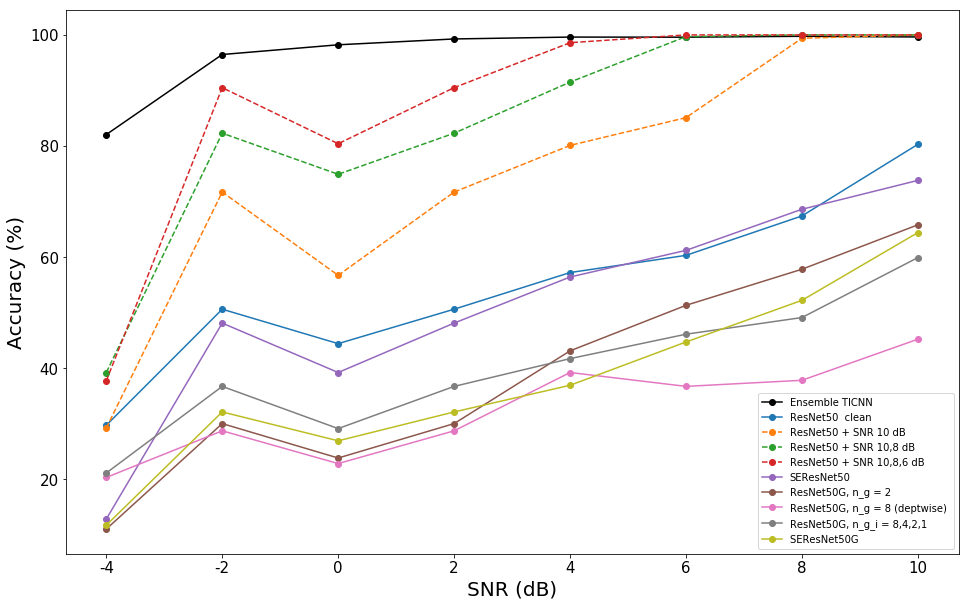

In [260]:
plt.figure(figsize = (16, 10))
plt.plot([82.05, 96.47, 98.22, 99.27, 99.61, 99.59, 99.75, 99.63],  'ko-', label = 'Ensemble TICNN')
plt.plot(H_R_noise_accr, 'o-', label = 'ResNet50  clean')
plt.plot(H_N10_R_noise_accr, 'o--', label = 'ResNet50 + SNR 10 dB')
plt.plot(H_N8_R_noise_accr, 'o--', label = 'ResNet50 + SNR 10,8 dB')
plt.plot(H_N6_R_noise_accr, 'o--', label = 'ResNet50 + SNR 10,8,6 dB')
plt.plot(H_S_noise_accr, 'o-', label = 'SEResNet50')
plt.plot(H_G_noise_accr, 'o-', label = 'ResNet50G, n_g = 2')
plt.plot(H_G_dw_noise_accr, 'o-', label = 'ResNet50G, n_g = 8 (deptwise) ')
plt.plot(H_G_v2_noise_accr, 'o-', label = 'ResNet50G, n_g_i = 8,4,2,1')
plt.plot(H_SG_noise_accr, 'o-', label = 'SEResNet50G ')

plt.legend(loc = 4, fontsize = 10)
plt.xlabel('SNR (dB)', fontsize = 20)
plt.yticks(fontsize =15)
plt.ylabel('Accuracy (%)', rotation = 90, fontsize = 20)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], [-4, -2, 0, 2, 4, 6, 8, 10], fontsize =15)
plt.show()

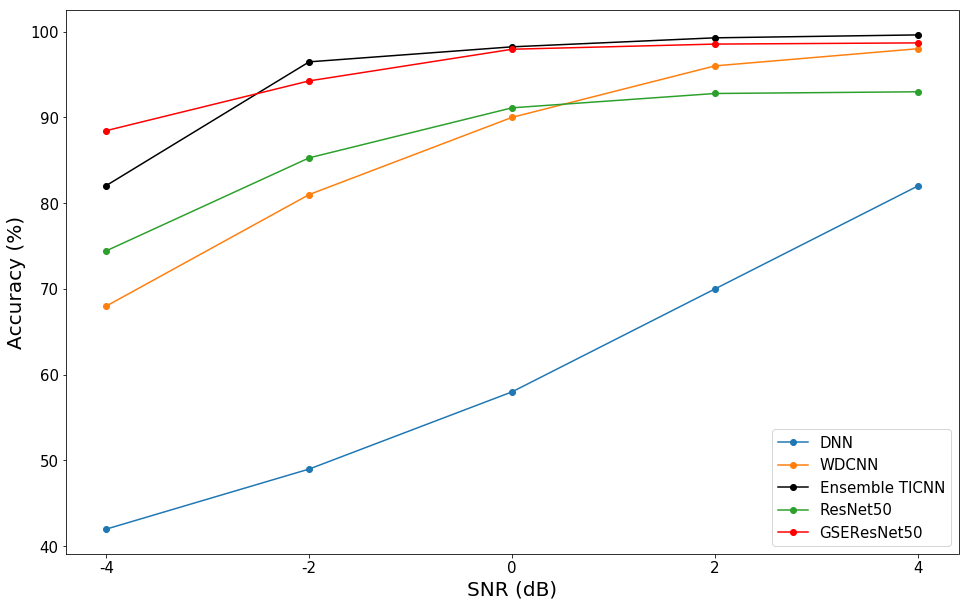

In [285]:
fig = plt.figure(figsize = (16, 10))
plt.plot([42, 49, 58, 70, 82],  'o-', label = 'DNN')
plt.plot([68, 81, 90, 96, 98],  'o-', label = 'WDCNN')
plt.plot([82.05, 96.47, 98.22, 99.27, 99.61],  'ko-', label = 'Ensemble TICNN')
plt.plot([74.44, 85.28, 91.11, 92.78, 92.98],  'o-', label = 'ResNet50')
plt.plot([88.45, 94.25, 97.94, 98.54, 98.68],  'ro-', label = 'GSEResNet50')

plt.legend(loc = 4, fontsize = 15)
plt.xlabel('SNR (dB)', fontsize = 20)
plt.yticks(fontsize =15)
plt.ylabel('Accuracy (%)', rotation = 90, fontsize = 20)
plt.xticks([0, 1, 2, 3, 4], [-4, -2, 0, 2, 4], fontsize =15)
plt.show()

fig.savefig("Roustnees Test.png", dpi = 300)

In [125]:
import pandas as pd
from pandas import DataFrame

In [272]:
comparison_df = DataFrame(columns=(["model", '-4', '-2', '0', '2','4', '6', '8', '10', 'plain test']))
model_type = [ 'Ensemble TICNN', 'ResNet50', 'GResNet50', 'SEResNet50', 'GSEResNet50']
TICNN_accr = [82.05, 96.47, 98.22, 99.27, 99.61, 99.59, 99.75, 99.63]
plain_test = ['-', '98.52 %', '98.68 %', '97.52 %', '99.76 %']

In [273]:
noise_results = {'Ensemble TICNN': TICNN_accr, 'ResNet50': H_R_noise_accr, 'GResNet50': H_G_noise_accr,
                'SEResNet50': H_S_noise_accr, 'GSEResNet50': H_SG_noise_accr}

for i, model in enumerate(model_type):
    v = []
    for k in range(8):
        v.append("{:.2f} %".format(noise_results[model][k])) 
    comparison_df.loc[i] = [model, v[0], v[1], v[2], v[3], v[4], v[5], v[6], v[7], plain_test[i]]   
comparison_df

,model,-4,-2,0,2,4,6,8,10,plain test
0,Ensemble TICNN,82.05 %,96.47 %,98.22 %,99.27 %,99.61 %,99.59 %,99.75 %,99.63 %,-
1,ResNet50,29.70 %,50.60 %,44.40 %,50.60 %,57.20 %,60.30 %,67.40 %,80.30 %,98.52 %
2,GResNet50,11.00 %,30.00 %,23.80 %,30.00 %,43.10 %,51.30 %,57.80 %,65.80 %,98.68 %
3,SEResNet50,12.80 %,48.10 %,39.20 %,48.10 %,56.40 %,61.20 %,68.60 %,73.80 %,97.52 %
4,GSEResNet50,11.70 %,32.10 %,26.90 %,32.10 %,36.90 %,44.70 %,52.20 %,64.40 %,99.76 %


In [275]:
comparison_df.to_csv("results.csv")

In [ ]:
comparison_df = DataFrame(columns=(["model", 'data', '-4', '-2', '0', '2','4','6', '8', '10']))
model_type = [ 'VGG16', 'ResNet50', 'SEResNet50']
data_type = ['HHT(100x100x8)', 'STFT(100x100)', 'STFT(150x150)', 'STFT(100x100x8)']

In [154]:
noise_results = {'VGG16':{'HHT(100x100x8)': [H_V_noise_accr, H_V_noise_std], 
                          'STFT(100x100)': [S_1_V_noise_accr, S_1_V_noise_std], 
                          'STFT(150x150)': [S_2_V_noise_accr, S_2_V_noise_std], 
                          'STFT(100x100x8)': [S_C_V_noise_accr, S_C_V_noise_std]},
                 'ResNet50':{'HHT(100x100x8)': [H_R_noise_accr, H_R_noise_std], 
                          'STFT(100x100)': [S_1_R_noise_accr, S_1_R_noise_std], 
                          'STFT(150x150)': [S_2_R_noise_accr, S_2_R_noise_std], 
                          'STFT(100x100x8)': [S_C_R_noise_accr, S_C_R_noise_std]},
                 'SEResNet50':{'HHT(100x100x8)': [H_S_noise_accr, H_S_noise_std], 
                               'STFT(100x100)': [S_1_S_noise_accr, S_1_S_noise_std], 
                               'STFT(150x150)': [S_2_S_noise_accr, S_2_S_noise_std], 
                               'STFT(100x100x8)': [S_C_S_noise_accr, S_C_S_noise_std]}}

In [155]:
for i, model in enumerate(model_type):
    for j, data in enumerate(data_type):
        v = []
        for k in range(8):
            v.append("{:.2f} %".format(noise_results[model][data][0][k])) 
        comparison_df.loc[4*i+j] = [model, data, v[0], v[1], v[2], v[3], v[4], v[5], v[6], v[7]]   
comparison_df

,model,data,-4,-2,0,2,4,6,8,10
0,VGG16,HHT(100x100x8),16.70 %,25.30 %,26.00 %,25.30 %,33.60 %,41.40 %,59.30 %,65.00 %
1,VGG16,STFT(100x100),16.89 %,21.31 %,28.53 %,42.46 %,64.79 %,78.65 %,84.30 %,86.16 %
2,VGG16,STFT(150x150),90.00 %,92.50 %,95.00 %,95.00 %,97.50 %,97.50 %,97.50 %,97.50 %
3,VGG16,STFT(100x100x8),10.00 %,13.60 %,11.20 %,13.60 %,26.00 %,39.70 %,68.00 %,86.70 %
4,ResNet50,HHT(100x100x8),29.70 %,50.60 %,44.40 %,50.60 %,57.20 %,60.30 %,67.40 %,80.30 %
5,ResNet50,STFT(100x100),31.74 %,36.96 %,42.70 %,49.31 %,55.30 %,62.06 %,75.11 %,82.90 %
6,ResNet50,STFT(150x150),36.00 %,46.70 %,57.40 %,67.70 %,76.30 %,76.00 %,76.50 %,77.90 %
7,ResNet50,STFT(100x100x8),18.40 %,64.20 %,40.10 %,64.20 %,72.40 %,81.20 %,85.60 %,90.40 %
8,SEResNet50,HHT(100x100x8),12.80 %,48.10 %,39.20 %,48.10 %,56.40 %,61.20 %,68.60 %,73.80 %
9,SEResNet50,STFT(100x100),31.02 %,41.48 %,54.85 %,61.61 %,63.26 %,71.80 %,77.17 %,77.92 %


In [156]:
for i, model in enumerate(model_type):
    for j, data in enumerate(data_type):
        v = []
        for k in range(8):
            v.append("{:.2f} +/- {:.2f} %".format(noise_results[model][data][0][k], noise_results[model][data][1][k])) 
        comparison_df.loc[4*i+j] = [model, data, v[0], v[1], v[2], v[3], v[4], v[5], v[6], v[7]]   
comparison_df

,model,data,-4,-2,0,2,4,6,8,10
0,VGG16,HHT(100x100x8),16.70 +/- 37.30 %,25.30 +/- 43.47 %,26.00 +/- 43.86 %,25.30 +/- 43.47 %,33.60 +/- 47.23 %,41.40 +/- 49.25 %,59.30 +/- 49.13 %,65.00 +/- 47.70 %
1,VGG16,STFT(100x100),16.89 +/- 37.47 %,21.31 +/- 40.95 %,28.53 +/- 45.16 %,42.46 +/- 49.43 %,64.79 +/- 47.76 %,78.65 +/- 40.98 %,84.30 +/- 36.38 %,86.16 +/- 34.53 %
2,VGG16,STFT(150x150),90.00 +/- 30.00 %,92.50 +/- 26.34 %,95.00 +/- 21.79 %,95.00 +/- 21.79 %,97.50 +/- 15.61 %,97.50 +/- 15.61 %,97.50 +/- 15.61 %,97.50 +/- 15.61 %
3,VGG16,STFT(100x100x8),10.00 +/- 30.00 %,13.60 +/- 34.28 %,11.20 +/- 31.54 %,13.60 +/- 34.28 %,26.00 +/- 43.86 %,39.70 +/- 48.93 %,68.00 +/- 46.65 %,86.70 +/- 33.96 %
4,ResNet50,HHT(100x100x8),29.70 +/- 45.69 %,50.60 +/- 50.00 %,44.40 +/- 49.69 %,50.60 +/- 50.00 %,57.20 +/- 49.48 %,60.30 +/- 48.93 %,67.40 +/- 46.87 %,80.30 +/- 39.77 %
5,ResNet50,STFT(100x100),31.74 +/- 46.55 %,36.96 +/- 48.27 %,42.70 +/- 49.46 %,49.31 +/- 50.00 %,55.30 +/- 49.72 %,62.06 +/- 48.52 %,75.11 +/- 43.24 %,82.90 +/- 37.65 %
6,ResNet50,STFT(150x150),36.00 +/- 48.00 %,46.70 +/- 49.89 %,57.40 +/- 49.45 %,67.70 +/- 46.76 %,76.30 +/- 42.52 %,76.00 +/- 42.71 %,76.50 +/- 42.40 %,77.90 +/- 41.49 %
7,ResNet50,STFT(100x100x8),18.40 +/- 38.75 %,64.20 +/- 47.94 %,40.10 +/- 49.01 %,64.20 +/- 47.94 %,72.40 +/- 44.70 %,81.20 +/- 39.07 %,85.60 +/- 35.11 %,90.40 +/- 29.46 %
8,SEResNet50,HHT(100x100x8),12.80 +/- 33.41 %,48.10 +/- 49.96 %,39.20 +/- 48.82 %,48.10 +/- 49.96 %,56.40 +/- 49.59 %,61.20 +/- 48.73 %,68.60 +/- 46.41 %,73.80 +/- 43.97 %
9,SEResNet50,STFT(100x100),31.02 +/- 46.26 %,41.48 +/- 49.27 %,54.85 +/- 49.76 %,61.61 +/- 48.63 %,63.26 +/- 48.21 %,71.80 +/- 45.00 %,77.17 +/- 41.97 %,77.92 +/- 41.48 %


## wrong!!

In [139]:
accr_H_R_m4, std_H_R_m4 = compute_accr_std(labels_hht_m4, preds_H_R_m4)
accr_H_R_m2, std_H_R_m2 = compute_accr_std(labels_hht_m2, preds_H_R_m2)
accr_H_R_0, std_H_R_0 = compute_accr_std(labels_hht_0, preds_H_R_0)
accr_H_R_2, std_H_R_2 = compute_accr_std(labels_hht_2, preds_H_R_2)
accr_H_R_4, std_H_R_4 = compute_accr_std(labels_hht_4, preds_H_R_4)
accr_H_R_6, std_H_R_6 = compute_accr_std(labels_hht_6, preds_H_R_6)
accr_H_R_8, std_H_R_8 = compute_accr_std(labels_hht_8, preds_H_R_8)
accr_H_R_10, std_H_R_10 = compute_accr_std(labels_hht_10, preds_H_R_10)

Accuracy: 29.70 +/- 45.69%
Accuracy: 50.60 +/- 50.00%
Accuracy: 44.40 +/- 49.69%
Accuracy: 50.60 +/- 50.00%
Accuracy: 57.20 +/- 49.48%
Accuracy: 60.30 +/- 48.93%
Accuracy: 67.40 +/- 46.87%
Accuracy: 80.30 +/- 39.77%


In [143]:
accr_H_V_m4, std_H_V_m4 = compute_accr_std(labels_hht_m4, preds_H_V_m4)
accr_H_V_m2, std_H_V_m2 = compute_accr_std(labels_hht_m2, preds_H_V_m2)
accr_H_V_0, std_H_V_0 = compute_accr_std(labels_hht_0, preds_H_V_0)
accr_H_V_2, std_H_V_2 = compute_accr_std(labels_hht_2, preds_H_V_2)
accr_H_V_4, std_H_V_4 = compute_accr_std(labels_hht_4, preds_H_V_4)
accr_H_V_6, std_H_V_6 = compute_accr_std(labels_hht_6, preds_H_V_6)
accr_H_V_8, std_H_V_8 = compute_accr_std(labels_hht_8, preds_H_V_8)
accr_H_V_10, std_H_V_10 = compute_accr_std(labels_hht_10, preds_H_V_10)

Accuracy: 16.70 +/- 37.30%
Accuracy: 25.30 +/- 43.47%
Accuracy: 26.00 +/- 43.86%
Accuracy: 25.30 +/- 43.47%
Accuracy: 33.60 +/- 47.23%
Accuracy: 41.40 +/- 49.25%
Accuracy: 59.30 +/- 49.13%
Accuracy: 65.00 +/- 47.70%


In [144]:
accr_S_1_R_m4, std_S_1_R_m4 = compute_accr_std(labels_stft_v1_m4, preds_S_1_R_m4)
accr_S_1_R_m2, std_S_1_R_m2 = compute_accr_std(labels_stft_v1_m2, preds_S_1_R_m2)
accr_S_1_R_0, std_S_1_R_0 = compute_accr_std(labels_stft_v1_0, preds_S_1_R_0)
accr_S_1_R_2, std_S_1_R_2 = compute_accr_std(labels_stft_v1_2, preds_S_1_R_2)
accr_S_1_R_4, std_S_1_R_4 = compute_accr_std(labels_stft_v1_4, preds_S_1_R_4)
accr_S_1_R_6, std_S_1_R_6 = compute_accr_std(labels_stft_v1_6, preds_S_1_R_6)
accr_S_1_R_8, std_S_1_R_8 = compute_accr_std(labels_stft_v1_8, preds_S_1_R_8)
accr_S_1_R_10, std_S_1_R_10 = compute_accr_std(labels_stft_v1_10, preds_S_1_R_10)

Accuracy: 31.74 +/- 46.55%
Accuracy: 36.96 +/- 48.27%
Accuracy: 42.70 +/- 49.46%
Accuracy: 49.31 +/- 50.00%
Accuracy: 55.30 +/- 49.72%
Accuracy: 62.06 +/- 48.52%
Accuracy: 75.11 +/- 43.24%
Accuracy: 82.90 +/- 37.65%


In [145]:
accr_S_1_V_m4, std_S_1_V_m4 = compute_accr_std(labels_stft_v1_m4, preds_S_1_V_m4)
accr_S_1_V_m2, std_S_1_V_m2 = compute_accr_std(labels_stft_v1_m2, preds_S_1_V_m2)
accr_S_1_V_0, std_S_1_V_0 = compute_accr_std(labels_stft_v1_0, preds_S_1_V_0)
accr_S_1_V_2, std_S_1_V_2 = compute_accr_std(labels_stft_v1_2, preds_S_1_V_2)
accr_S_1_V_4, std_S_1_V_4 = compute_accr_std(labels_stft_v1_4, preds_S_1_V_4)
accr_S_1_V_6, std_S_1_V_6 = compute_accr_std(labels_stft_v1_6, preds_S_1_V_6)
accr_S_1_V_8, std_S_1_V_8 = compute_accr_std(labels_stft_v1_8, preds_S_1_V_8)
accr_S_1_V_10, std_S_1_V_10 = compute_accr_std(labels_stft_v1_10, preds_S_1_V_10)

Accuracy: 16.89 +/- 37.47%
Accuracy: 21.31 +/- 40.95%
Accuracy: 28.53 +/- 45.16%
Accuracy: 42.46 +/- 49.43%
Accuracy: 64.79 +/- 47.76%
Accuracy: 78.65 +/- 40.98%
Accuracy: 84.30 +/- 36.38%
Accuracy: 86.16 +/- 34.53%


In [146]:
accr_S_2_R_m4, std_S_2_R_m4 = compute_accr_std(labels_stft_v2_m4, preds_S_2_R_m4)
accr_S_2_R_m2, std_S_2_R_m2 = compute_accr_std(labels_stft_v2_m2, preds_S_2_R_m2)
accr_S_2_R_0, std_S_2_R_0 = compute_accr_std(labels_stft_v2_0, preds_S_2_R_0)
accr_S_2_R_2, std_S_2_R_2 = compute_accr_std(labels_stft_v2_2, preds_S_2_R_2)
accr_S_2_R_4, std_S_2_R_4 = compute_accr_std(labels_stft_v2_4, preds_S_2_R_4)
accr_S_2_R_6, std_S_2_R_6 = compute_accr_std(labels_stft_v2_6, preds_S_2_R_6)
accr_S_2_R_8, std_S_2_R_8 = compute_accr_std(labels_stft_v2_8, preds_S_2_R_8)
accr_S_2_R_10, std_S_2_R_10 = compute_accr_std(labels_stft_v2_10, preds_S_2_R_10)

Accuracy: 36.00 +/- 48.00%
Accuracy: 46.70 +/- 49.89%
Accuracy: 57.40 +/- 49.45%
Accuracy: 67.70 +/- 46.76%
Accuracy: 76.30 +/- 42.52%
Accuracy: 76.00 +/- 42.71%
Accuracy: 76.50 +/- 42.40%
Accuracy: 77.90 +/- 41.49%


In [147]:
accr_S_2_V_m4, std_S_2_V_m4 = compute_accr_std(labels_stft_v2_m4, preds_S_2_V_m4)
accr_S_2_V_m2, std_S_2_V_m2 = compute_accr_std(labels_stft_v2_m2, preds_S_2_V_m2)
accr_S_2_V_0, std_S_2_V_0 = compute_accr_std(labels_stft_v2_0, preds_S_2_V_0)
accr_S_2_V_2, std_S_2_V_2 = compute_accr_std(labels_stft_v2_2, preds_S_2_V_2)
accr_S_2_V_4, std_S_2_V_4 = compute_accr_std(labels_stft_v2_4, preds_S_2_V_4)
accr_S_2_V_6, std_S_2_V_6 = compute_accr_std(labels_stft_v2_6, preds_S_2_V_6)
accr_S_2_V_8, std_S_2_V_8 = compute_accr_std(labels_stft_v2_8, preds_S_2_V_8)
accr_S_2_V_10, std_S_2_V_10 = compute_accr_std(labels_stft_v2_10, preds_S_2_V_10)

Accuracy: 90.00 +/- 30.00%
Accuracy: 92.50 +/- 26.34%
Accuracy: 95.00 +/- 21.79%
Accuracy: 95.00 +/- 21.79%
Accuracy: 97.50 +/- 15.61%
Accuracy: 97.50 +/- 15.61%
Accuracy: 97.50 +/- 15.61%
Accuracy: 97.50 +/- 15.61%


In [148]:
accr_S_C_R_m4, std_S_C_R_m4 = compute_accr_std(labels_stft_ch_m4, preds_S_C_R_m4)
accr_S_C_R_m2, std_S_C_R_m2 = compute_accr_std(labels_stft_ch_m2, preds_S_C_R_m2)
accr_S_C_R_0, std_S_C_R_0 = compute_accr_std(labels_stft_ch_0, preds_S_C_R_0)
accr_S_C_R_2, std_S_C_R_2 = compute_accr_std(labels_stft_ch_2, preds_S_C_R_2)
accr_S_C_R_4, std_S_C_R_4 = compute_accr_std(labels_stft_ch_4, preds_S_C_R_4)
accr_S_C_R_6, std_S_C_R_6 = compute_accr_std(labels_stft_ch_6, preds_S_C_R_6)
accr_S_C_R_8, std_S_C_R_8 = compute_accr_std(labels_stft_ch_8, preds_S_C_R_8)
accr_S_C_R_10, std_S_C_R_10 = compute_accr_std(labels_stft_ch_10, preds_S_C_R_10)

Accuracy: 99.50 +/- 7.05%
Accuracy: 99.50 +/- 7.05%
Accuracy: 99.50 +/- 7.05%
Accuracy: 99.50 +/- 7.05%
Accuracy: 99.50 +/- 7.05%
Accuracy: 99.50 +/- 7.05%
Accuracy: 99.50 +/- 7.05%
Accuracy: 99.50 +/- 7.05%


In [149]:
accr_S_C_V_m4, std_S_C_V_m4 = compute_accr_std(labels_stft_ch_m4, preds_S_C_V_m4)
accr_S_C_V_m2, std_S_C_V_m2 = compute_accr_std(labels_stft_ch_m2, preds_S_C_V_m2)
accr_S_C_V_0, std_S_C_V_0 = compute_accr_std(labels_stft_ch_0, preds_S_C_V_0)
accr_S_C_V_2, std_S_C_V_2 = compute_accr_std(labels_stft_ch_2, preds_S_C_V_2)
accr_S_C_V_4, std_S_C_V_4 = compute_accr_std(labels_stft_ch_4, preds_S_C_V_4)
accr_S_C_V_6, std_S_C_V_6 = compute_accr_std(labels_stft_ch_6, preds_S_C_V_6)
accr_S_C_V_8, std_S_C_V_8 = compute_accr_std(labels_stft_ch_8, preds_S_C_V_8)
accr_S_C_V_10, std_S_C_V_10 = compute_accr_std(labels_stft_ch_10, preds_S_C_V_10)

Accuracy: 100.00 +/- 0.00%
Accuracy: 100.00 +/- 0.00%
Accuracy: 100.00 +/- 0.00%
Accuracy: 100.00 +/- 0.00%
Accuracy: 100.00 +/- 0.00%
Accuracy: 100.00 +/- 0.00%
Accuracy: 100.00 +/- 0.00%
Accuracy: 100.00 +/- 0.00%


In [112]:
H_R_noise_accr = [accr_H_R_m4, accr_H_R_m2, accr_H_R_0, accr_H_R_2, accr_H_R_4, accr_H_R_6, accr_H_R_8, accr_H_R_10]
H_V_noise_accr = [accr_H_V_m4, accr_H_V_m2, accr_H_V_0, accr_H_V_2, accr_H_V_4, accr_H_V_6, accr_H_V_8, accr_H_V_10]
S_1_R_noise_accr = [accr_S_1_R_m4, accr_S_1_R_m2, accr_S_1_R_0, accr_S_1_R_2, accr_S_1_R_4, accr_S_1_R_6, accr_S_1_R_8, accr_S_1_R_10]
S_1_V_noise_accr = [accr_S_1_V_m4, accr_S_1_V_m2, accr_S_1_V_0, accr_S_1_V_2, accr_S_1_V_4, accr_S_1_V_6, accr_S_1_V_8, accr_S_1_V_10]
S_2_R_noise_accr = [accr_S_2_R_m4, accr_S_2_R_m2, accr_S_2_R_0, accr_S_2_R_2, accr_S_2_R_4, accr_S_2_R_6, accr_S_2_R_8, accr_S_2_R_10]
S_2_V_noise_accr = [accr_S_2_V_m4, accr_S_2_V_m2, accr_S_2_V_0, accr_S_2_V_2, accr_S_2_V_4, accr_S_2_V_6, accr_S_2_V_8, accr_S_2_V_10]
S_C_R_noise_accr = [accr_S_C_R_m4, accr_S_C_R_m2, accr_S_C_R_0, accr_S_C_R_2, accr_S_C_R_4, accr_S_C_R_6, accr_S_C_R_8, accr_S_C_R_10]
S_C_V_noise_accr = [accr_S_C_V_m4, accr_S_C_V_m2, accr_S_C_V_0, accr_S_C_V_2, accr_S_C_V_4, accr_S_C_V_6, accr_S_C_V_8, accr_S_C_V_10]

In [152]:
H_R_noise_std = [std_H_R_m4, std_H_R_m2, std_H_R_0, std_H_R_2, std_H_R_4, std_H_R_6, std_H_R_8, std_H_R_10]
H_V_noise_std = [std_H_V_m4, std_H_V_m2, std_H_V_0, std_H_V_2, std_H_V_4, std_H_V_6, std_H_V_8, std_H_V_10]
S_1_R_noise_std = [std_S_1_R_m4, std_S_1_R_m2, std_S_1_R_0, std_S_1_R_2, std_S_1_R_4, std_S_1_R_6, std_S_1_R_8, std_S_1_R_10]
S_1_V_noise_std = [std_S_1_V_m4, std_S_1_V_m2, std_S_1_V_0, std_S_1_V_2, std_S_1_V_4, std_S_1_V_6, std_S_1_V_8, std_S_1_V_10]
S_2_R_noise_std = [std_S_2_R_m4, std_S_2_R_m2, std_S_2_R_0, std_S_2_R_2, std_S_2_R_4, std_S_2_R_6, std_S_2_R_8, std_S_2_R_10]
S_2_V_noise_std = [std_S_2_V_m4, std_S_2_V_m2, std_S_2_V_0, std_S_2_V_2, std_S_2_V_4, std_S_2_V_6, std_S_2_V_8, std_S_2_V_10]
S_C_R_noise_std = [std_S_C_R_m4, std_S_C_R_m2, std_S_C_R_0, std_S_C_R_2, std_S_C_R_4, std_S_C_R_6, std_S_C_R_8, std_S_C_R_10]
S_C_V_noise_std = [std_S_C_V_m4, std_S_C_V_m2, std_S_C_V_0, std_S_C_V_2, std_S_C_V_4, std_S_C_V_6, std_S_C_V_8, std_S_C_V_10]

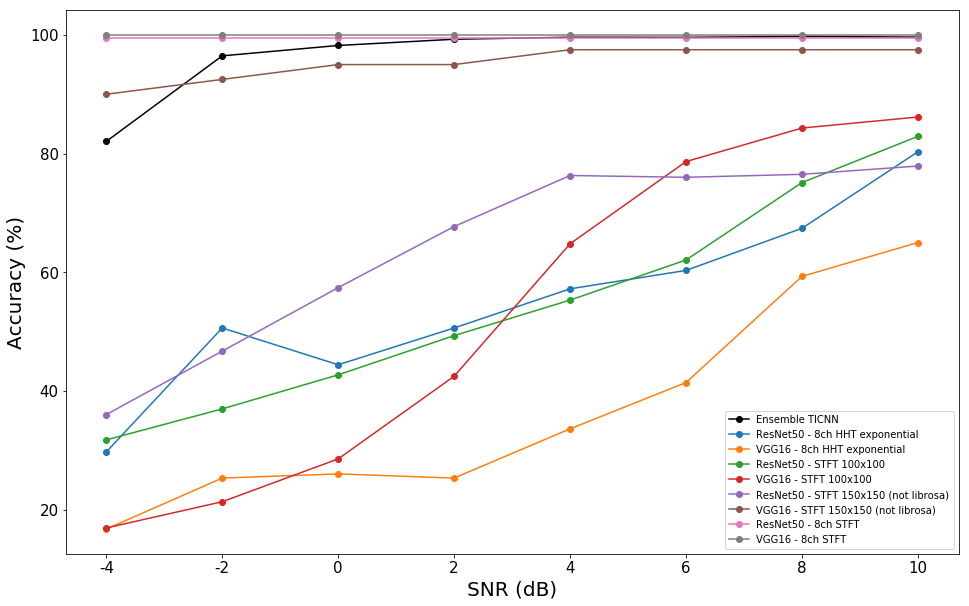

In [113]:
plt.figure(figsize = (16, 10))
plt.plot([82.05, 96.47, 98.22, 99.27, 99.61, 99.59, 99.75, 99.63],  'ko-', label = 'Ensemble TICNN')
plt.plot(H_R_noise_accr, 'o-', label = 'ResNet50 - 8ch HHT exponential')
plt.plot(H_V_noise_accr, 'o-', label = 'VGG16 - 8ch HHT exponential')
plt.plot(S_1_R_noise_accr, 'o-', label = 'ResNet50 - STFT 100x100')
plt.plot(S_1_V_noise_accr, 'o-', label = 'VGG16 - STFT 100x100')
plt.plot(S_2_R_noise_accr, 'o-', label = 'ResNet50 - STFT 150x150 (not librosa)')
plt.plot(S_2_V_noise_accr, 'o-', label = 'VGG16 - STFT 150x150 (not librosa)')
plt.plot(S_C_R_noise_accr, 'o-', label = 'ResNet50 - 8ch STFT')
plt.plot(S_C_V_noise_accr, 'o-', label = 'VGG16 - 8ch STFT')
plt.legend(loc = 4, fontsize = 10)
plt.xlabel('SNR (dB)', fontsize = 20)
plt.yticks(fontsize =15)
plt.ylabel('Accuracy (%)', rotation = 90, fontsize = 20)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], [-4, -2, 0, 2, 4, 6, 8, 10], fontsize =15)
plt.show()

In [151]:
import pandas as pd
from pandas import DataFrame

In [167]:
comparison_df = DataFrame(columns=(["model", 'data', '-4', '-2', '0', '2','4','6', '8', '10']))
model_type = ['ResNet50', 'VGG16']
data_type = ['HHT(100x100x8)', 'STFT(100x100)', 'STFT(150x150)', 'STFT(100x100x8)']

In [168]:
noise_results = {'ResNet50':{'HHT(100x100x8)': [H_R_noise_accr, H_R_noise_std], 
                          'STFT(100x100)': [S_1_R_noise_accr, S_1_R_noise_std], 
                          'STFT(150x150)': [S_2_R_noise_accr, S_2_R_noise_std], 
                          'STFT(100x100x8)': [S_C_R_noise_accr, S_C_R_noise_std]},
                 'VGG16':{'HHT(100x100x8)': [H_V_noise_accr, H_V_noise_std], 
                          'STFT(100x100)': [S_1_V_noise_accr, S_1_V_noise_std], 
                          'STFT(150x150)': [S_2_V_noise_accr, S_2_V_noise_std], 
                          'STFT(100x100x8)': [S_C_V_noise_accr, S_C_V_noise_std]}}

In [176]:
for j, data in enumerate(data_type):
    for i, model in enumerate(model_type):
        v = []
        for k in range(8):
            v.append("{:.2f} %".format(noise_results[model][data][0][k])) 
        comparison_df.loc[2*j+i] = [model, data, v[0], v[1], v[2], v[3], v[4], v[5], v[6], v[7]]   
comparison_df

,model,data,-4,-2,0,2,4,6,8,10
0,ResNet50,HHT(100x100x8),29.70 %,50.60 %,44.40 %,50.60 %,57.20 %,60.30 %,67.40 %,80.30 %
1,VGG16,HHT(100x100x8),16.70 %,25.30 %,26.00 %,25.30 %,33.60 %,41.40 %,59.30 %,65.00 %
2,ResNet50,STFT(100x100),31.74 %,36.96 %,42.70 %,49.31 %,55.30 %,62.06 %,75.11 %,82.90 %
3,VGG16,STFT(100x100),16.89 %,21.31 %,28.53 %,42.46 %,64.79 %,78.65 %,84.30 %,86.16 %
4,ResNet50,STFT(150x150),36.00 %,46.70 %,57.40 %,67.70 %,76.30 %,76.00 %,76.50 %,77.90 %
5,VGG16,STFT(150x150),90.00 %,92.50 %,95.00 %,95.00 %,97.50 %,97.50 %,97.50 %,97.50 %
6,ResNet50,STFT(100x100x8),99.50 %,99.50 %,99.50 %,99.50 %,99.50 %,99.50 %,99.50 %,99.50 %
7,VGG16,STFT(100x100x8),100.00 %,100.00 %,100.00 %,100.00 %,100.00 %,100.00 %,100.00 %,100.00 %


In [175]:
for j, data in enumerate(data_type):
    for i, model in enumerate(model_type):
        v = []
        for k in range(8):
            v.append("{:.2f} +/- {:.2f} %".format(noise_results[model][data][0][k], noise_results[model][data][1][k])) 
        comparison_df.loc[2*j+i] = [model, data, v[0], v[1], v[2], v[3], v[4], v[5], v[6], v[7]]   
comparison_df

,model,data,-4,-2,0,2,4,6,8,10
0,ResNet50,HHT(100x100x8),29.70 +/- 45.69 %,50.60 +/- 50.00 %,44.40 +/- 49.69 %,50.60 +/- 50.00 %,57.20 +/- 49.48 %,60.30 +/- 48.93 %,67.40 +/- 46.87 %,80.30 +/- 39.77 %
1,VGG16,HHT(100x100x8),16.70 +/- 37.30 %,25.30 +/- 43.47 %,26.00 +/- 43.86 %,25.30 +/- 43.47 %,33.60 +/- 47.23 %,41.40 +/- 49.25 %,59.30 +/- 49.13 %,65.00 +/- 47.70 %
2,ResNet50,STFT(100x100),31.74 +/- 46.55 %,36.96 +/- 48.27 %,42.70 +/- 49.46 %,49.31 +/- 50.00 %,55.30 +/- 49.72 %,62.06 +/- 48.52 %,75.11 +/- 43.24 %,82.90 +/- 37.65 %
3,VGG16,STFT(100x100),16.89 +/- 37.47 %,21.31 +/- 40.95 %,28.53 +/- 45.16 %,42.46 +/- 49.43 %,64.79 +/- 47.76 %,78.65 +/- 40.98 %,84.30 +/- 36.38 %,86.16 +/- 34.53 %
4,ResNet50,STFT(150x150),36.00 +/- 48.00 %,46.70 +/- 49.89 %,57.40 +/- 49.45 %,67.70 +/- 46.76 %,76.30 +/- 42.52 %,76.00 +/- 42.71 %,76.50 +/- 42.40 %,77.90 +/- 41.49 %
5,VGG16,STFT(150x150),90.00 +/- 30.00 %,92.50 +/- 26.34 %,95.00 +/- 21.79 %,95.00 +/- 21.79 %,97.50 +/- 15.61 %,97.50 +/- 15.61 %,97.50 +/- 15.61 %,97.50 +/- 15.61 %
6,ResNet50,STFT(100x100x8),99.50 +/- 7.05 %,99.50 +/- 7.05 %,99.50 +/- 7.05 %,99.50 +/- 7.05 %,99.50 +/- 7.05 %,99.50 +/- 7.05 %,99.50 +/- 7.05 %,99.50 +/- 7.05 %
7,VGG16,STFT(100x100x8),100.00 +/- 0.00 %,100.00 +/- 0.00 %,100.00 +/- 0.00 %,100.00 +/- 0.00 %,100.00 +/- 0.00 %,100.00 +/- 0.00 %,100.00 +/- 0.00 %,100.00 +/- 0.00 %
